In [6]:
from numpy import vstack,sqrt
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from torch.utils.data import Dataset,DataLoader,random_split
from torch import Tensor
from torch.nn import Linear,Sigmoid,Module,MSELoss,ReLU
from torch.optim import SGD
from torch.nn.init import xavier_uniform_
from tqdm import tqdm
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from datetime import datetime as dt
%matplotlib inline
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/nyse/prices-split-adjusted.csv
/kaggle/input/nyse/fundamentals.csv
/kaggle/input/nyse/prices.csv
/kaggle/input/nyse/securities.csv


# **Prices Adjusted**

In [7]:

df = pd.read_csv("/kaggle/input/nyse/prices-split-adjusted.csv", index_col = 0)
df.info()
df.head()

# number of different stocks
print(list(set(df.symbol)))

<class 'pandas.core.frame.DataFrame'>
Index: 851264 entries, 2016-01-05 to 2016-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  851264 non-null  object 
 1   open    851264 non-null  float64
 2   close   851264 non-null  float64
 3   low     851264 non-null  float64
 4   high    851264 non-null  float64
 5   volume  851264 non-null  float64
dtypes: float64(5), object(1)
memory usage: 45.5+ MB
['ETN', 'AME', 'NEM', 'UPS', 'FTR', 'RTN', 'DISCA', 'BAX', 'NBL', 'TRIP', 'BHI', 'PYPL', 'STI', 'LUV', 'DNB', 'IR', 'DRI', 'AMG', 'BLK', 'LH', 'SBUX', 'CAH', 'GS', 'IDXX', 'SPGI', 'DOW', 'TXN', 'DPS', 'IFF', 'DE', 'CTL', 'BEN', 'STT', 'PRU', 'EQIX', 'NAVI', 'OMC', 'MNK', 'WM', 'FE', 'CPB', 'SYK', 'QRVO', 'PNR', 'CNC', 'HAL', 'YUM', 'NWSA', 'AWK', 'CSRA', 'LUK', 'UDR', 'HOG', 'HP', 'CELG', 'DLR', 'NVDA', 'MON', 'PG', 'ILMN', 'ADM', 'AIG', 'UTX', 'HSIC', 'AN', 'VNO', 'REGN', 'VTR', 'COP', 'GOOGL', 'ACN', 'SYF', 'SEE', 'MA

In [8]:
df.tail()

,symbol,open,close,low,high,volume
date,,,,,,
2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0
2016-12-30,FTV,54.200001,53.630001,53.389999,54.480000,705100.0


In [9]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 851264 entries, 2016-01-05 to 2016-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  851264 non-null  object 
 1   open    851264 non-null  float64
 2   close   851264 non-null  float64
 3   low     851264 non-null  float64
 4   high    851264 non-null  float64
 5   volume  851264 non-null  float64
dtypes: float64(5), object(1)
memory usage: 45.5+ MB


Text(0, 0.5, 'close price')

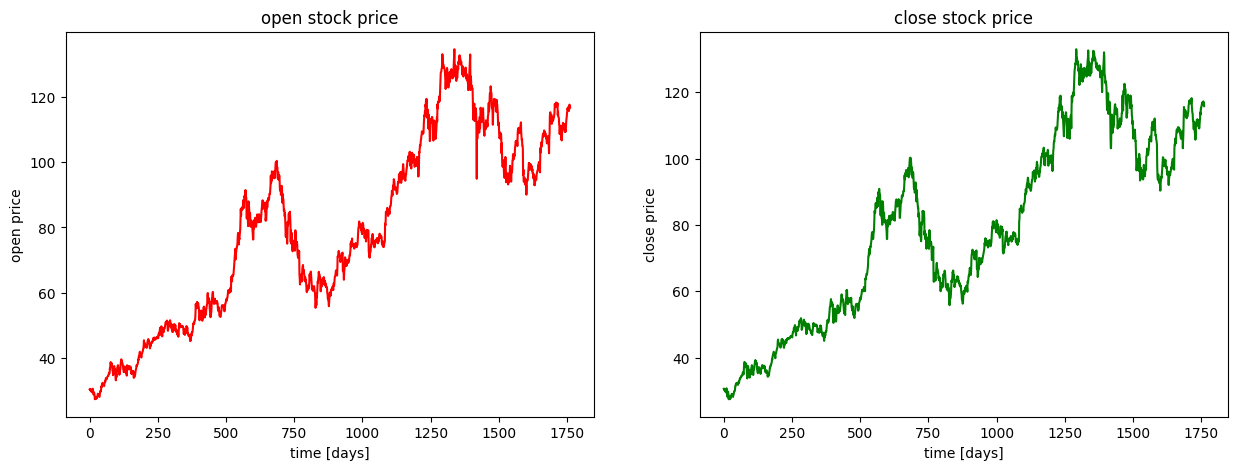

In [11]:
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(df[df.symbol == 'AAPL'].open.values, color='red', label='open')
plt.title('open stock price')
plt.xlabel('time [days]')
plt.ylabel('open price')
plt.subplot(1,2,2);
plt.plot(df[df.symbol == 'AAPL'].close.values, color='green', label='close')
plt.title('close stock price')
plt.xlabel('time [days]')
plt.ylabel('close price')

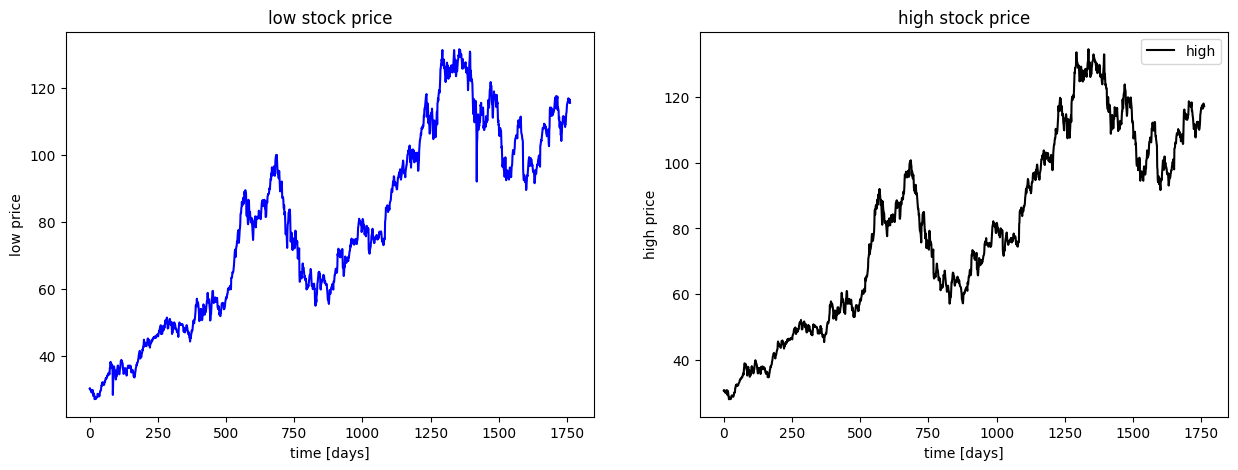

In [12]:
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(df[df.symbol == 'AAPL'].low.values, color='blue', label='low')
plt.title('low stock price')
plt.xlabel('time [days]')
plt.ylabel('low price')
plt.subplot(1,2,2);
plt.plot(df[df.symbol == 'AAPL'].high.values, color='black', label='high')
plt.title('high stock price')
plt.xlabel('time [days]')
plt.ylabel('high price')
plt.legend(loc='best')

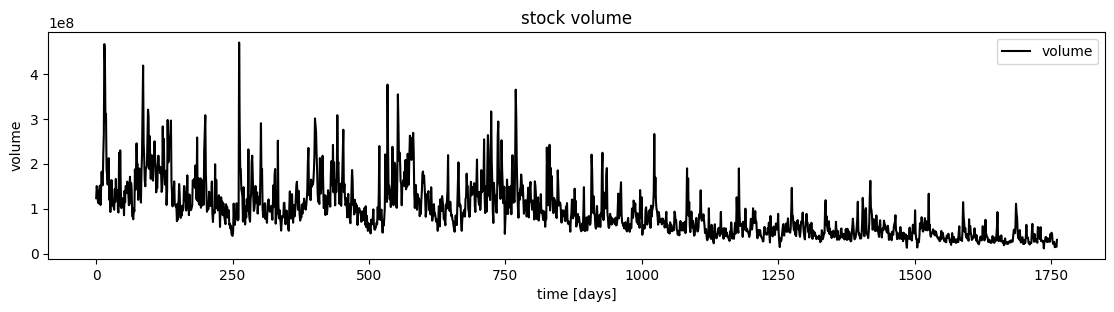

In [13]:
plt.figure(figsize=(30, 10));
plt.subplot(3,2,1);
plt.plot(df[df.symbol == 'AAPL'].volume.values, color='black', label='volume')
plt.title('stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');

<Axes: >

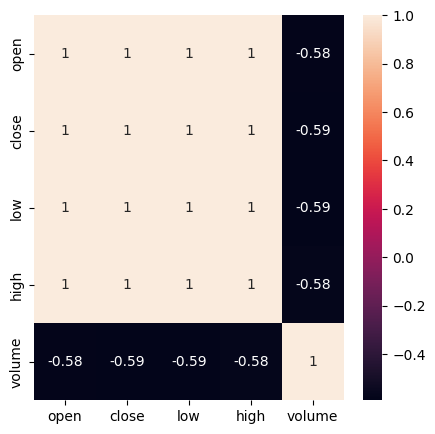

In [14]:
df = df[df['symbol']=='AAPL']   # Choosin stock values for any company 
df=df.drop('symbol',axis=1)
cormap = df.corr()
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cormap, annot = True)

In [15]:
def get_corelated_col(cor_dat, threshold): 
  # Cor_data to be column along which corelation to be measured 
  #Threshold be the value above which of corelation to considered
  feature=[]
  value=[]

  for i ,index in enumerate(cor_dat.index):
    if abs(cor_dat[index]) > threshold:
      feature.append(index)
      value.append(cor_dat[index])

  df = pd.DataFrame(data = value, index = feature, columns=['corr value'])
  return df

In [16]:
top_corelated_values = get_corelated_col(cormap['close'], 0.60)
top_corelated_values

,corr value
open,0.999254
close,1.000000
low,0.999657
high,0.999660


In [17]:
df = df[top_corelated_values.index]
df.head()

,open,close,low,high
date,,,,
2010-01-04,30.490000,30.572857,30.340000,30.642857
2010-01-05,30.657143,30.625713,30.464285,30.798571
2010-01-06,30.625713,30.138571,30.107143,30.747143
2010-01-07,30.250000,30.082857,29.864286,30.285715
2010-01-08,30.042856,30.282858,29.865715,30.285715


In [18]:
df.shape

(1762, 4)

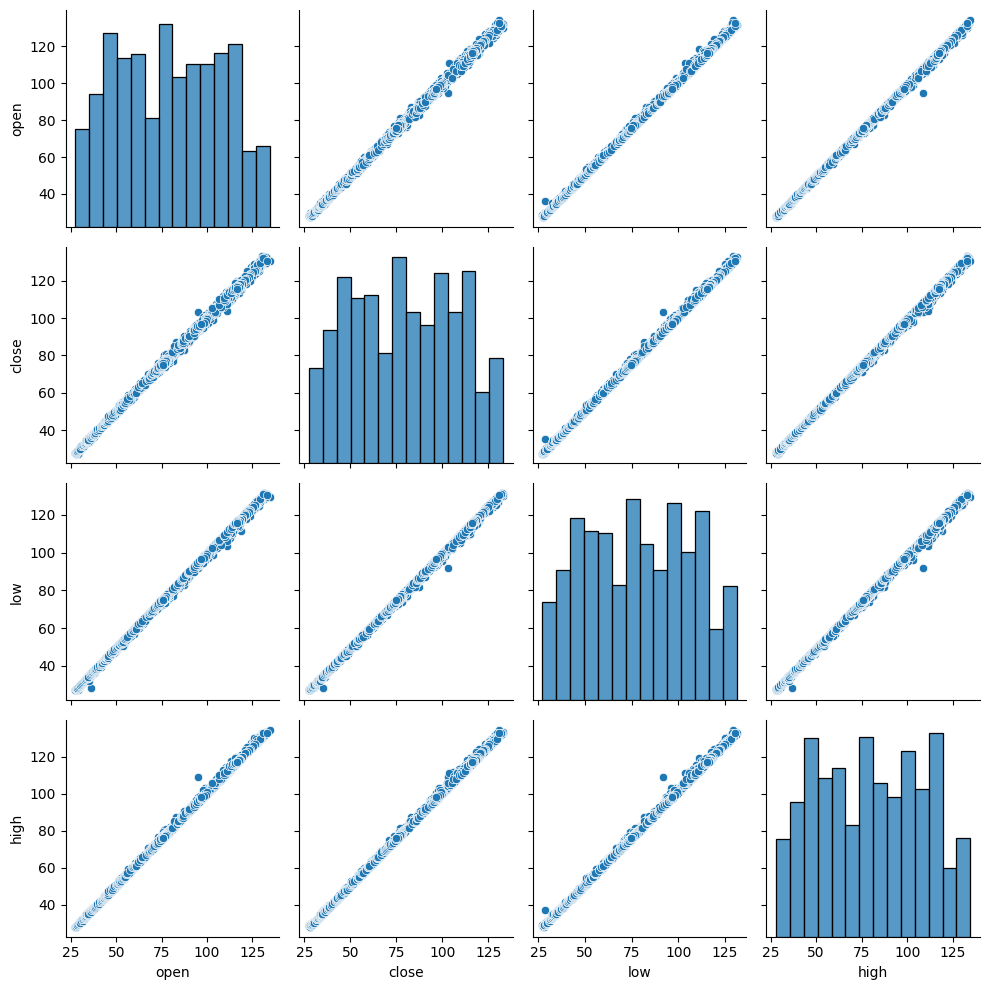

In [19]:
sns.pairplot(df)
plt.tight_layout()

In [20]:
X = df.drop(['close'], axis=1)
y = df['close']

# **Prices:**

In [21]:
prices_dataframe = pd.read_csv('/kaggle/input/nyse/prices.csv')

In [22]:
prices_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [23]:
prices_dataframe.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [24]:
prices_dataframe.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [25]:
print(f"Total number of unique stock symbols available in dataset: {len(np.unique(prices_dataframe['symbol']))}")

Total number of unique stock symbols available in dataset: 501


In [26]:
prices_dataframe = prices_dataframe.loc[prices_dataframe['symbol']=='AAPL']
prices_dataframe.drop('symbol', axis=1, inplace=True)
print(np.shape(prices_dataframe))
prices_dataframe.head()

(1762, 6)


,date,open,close,low,high,volume
254,2010-01-04,213.429998,214.009998,212.380001,214.499996,123432400.0
721,2010-01-05,214.599998,214.379993,213.249994,215.589994,150476200.0
1189,2010-01-06,214.379993,210.969995,210.750004,215.230000,138040000.0
1657,2010-01-07,211.750000,210.580000,209.050005,212.000006,119282800.0
2125,2010-01-08,210.299994,211.980005,209.060005,212.000006,111902700.0


In [27]:
# changing the index to date

prices_dataframe['date'] = pd.to_datetime(prices_dataframe['date'])
prices_dataframe = prices_dataframe.set_index('date')

prices_dataframe.head()

,open,close,low,high,volume
date,,,,,
2010-01-04,213.429998,214.009998,212.380001,214.499996,123432400.0
2010-01-05,214.599998,214.379993,213.249994,215.589994,150476200.0
2010-01-06,214.379993,210.969995,210.750004,215.230000,138040000.0
2010-01-07,211.750000,210.580000,209.050005,212.000006,119282800.0
2010-01-08,210.299994,211.980005,209.060005,212.000006,111902700.0


In [28]:
# finding NaNs

prices_dataframe.dropna(axis=0 , inplace=True)
prices_dataframe.isna().sum()

open      0
close     0
low       0
high      0
volume    0
dtype: int64

### Visualization
### Plotting CandelStick : Depicts all data using candlestick charts

In [29]:
Min_date = prices_dataframe.index.min()
Max_date = prices_dataframe.index.max()
print ("First date is",Min_date)
print ("Last date is",Max_date)
print (Max_date - Min_date)

First date is 2010-01-04 00:00:00
Last date is 2016-12-30 00:00:00
2552 days 00:00:00


In [30]:
import pandas as pd
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot


trace = go.Ohlc(x=prices_dataframe.index,
               open=prices_dataframe['open'],
               high=prices_dataframe['high'],
               low=prices_dataframe['low'],
               close=prices_dataframe['close'])

layout = go.Layout(title='Candlestick Chart',
                   xaxis=dict(title='Date'),
                   yaxis=dict(title='Price'))

fig = go.Figure(data=[trace], layout=layout)

iplot(fig, filename='candlestick_chart')

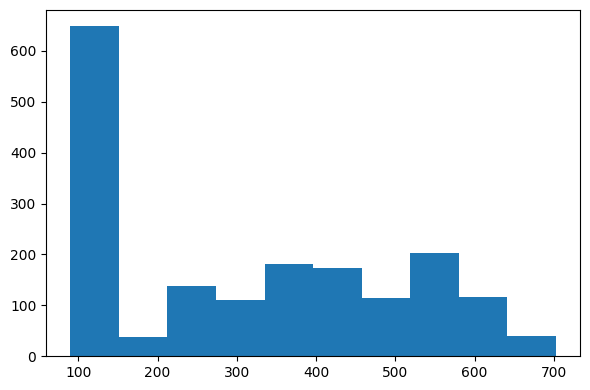

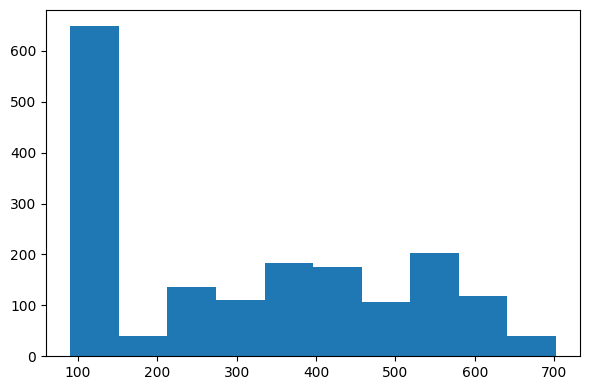

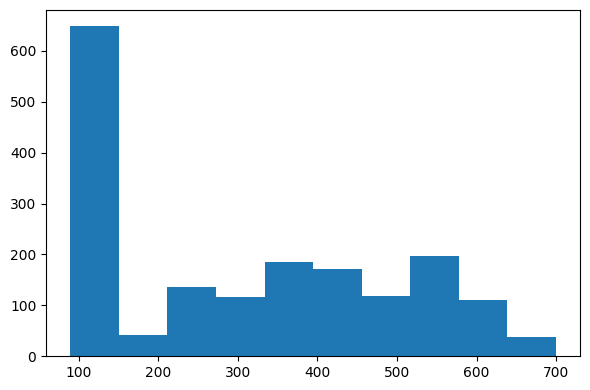

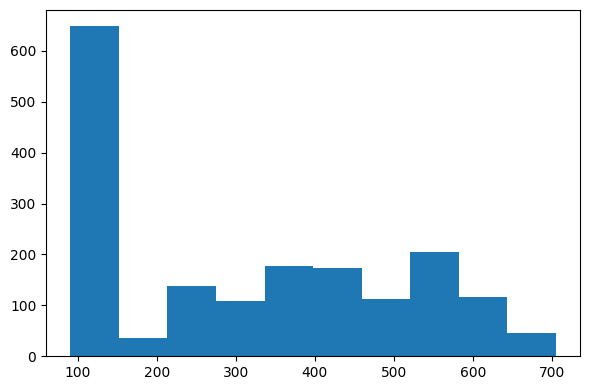

In [31]:
# distribution of price x value in the dataframe

plt.figure(figsize=(6, 4))
plt.hist(prices_dataframe['open'], bins=10)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
plt.hist(prices_dataframe['close'], bins=10)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
plt.hist(prices_dataframe['low'], bins=10)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
plt.hist(prices_dataframe['high'], bins=10)
plt.tight_layout()
plt.show()

In [32]:
prices_dataframe = prices_dataframe.sample(frac=0.75, replace=False, random_state=7)
prices_dataframe['year'] = prices_dataframe.index.year
prices_dataframe['month'] = prices_dataframe.index.month
prices_dataframe['day'] = prices_dataframe.index.day

# **Fundamentals:**

In [33]:
fundamentals_dataframe = pd.read_csv('/kaggle/input/nyse/fundamentals.csv', index_col=['Unnamed: 0'])
fundamentals_dataframe.head()
fundamentals_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1781 entries, 0 to 1780
Data columns (total 78 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Ticker Symbol                                        1781 non-null   object 
 1   Period Ending                                        1781 non-null   object 
 2   Accounts Payable                                     1781 non-null   float64
 3   Accounts Receivable                                  1781 non-null   float64
 4   Add'l income/expense items                           1781 non-null   float64
 5   After Tax ROE                                        1781 non-null   float64
 6   Capital Expenditures                                 1781 non-null   float64
 7   Capital Surplus                                      1781 non-null   float64
 8   Cash Ratio                                           1482 non-null   floa

In [34]:
fundamentals_dataframe.isnull().sum(axis=0)

missing_columns = ['Current Ratio', 'Cash Ratio', 'Quick Ratio', 'For Year', 'Earnings Per Share', 'Estimated Shares Outstanding']
for column in missing_columns:
    median_value = fundamentals_dataframe[column].median()
    fundamentals_dataframe[column] = fundamentals_dataframe[column].fillna(median_value)

In [35]:
fundamentals_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1781 entries, 0 to 1780
Data columns (total 78 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Ticker Symbol                                        1781 non-null   object 
 1   Period Ending                                        1781 non-null   object 
 2   Accounts Payable                                     1781 non-null   float64
 3   Accounts Receivable                                  1781 non-null   float64
 4   Add'l income/expense items                           1781 non-null   float64
 5   After Tax ROE                                        1781 non-null   float64
 6   Capital Expenditures                                 1781 non-null   float64
 7   Capital Surplus                                      1781 non-null   float64
 8   Cash Ratio                                           1781 non-null   floa

# **Securities:**

In [36]:
securities_dataframe = pd.read_csv('/kaggle/input/nyse/securities.csv')
securities_dataframe.head()
securities_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Ticker symbol            505 non-null    object
 1   Security                 505 non-null    object
 2   SEC filings              505 non-null    object
 3   GICS Sector              505 non-null    object
 4   GICS Sub Industry        505 non-null    object
 5   Address of Headquarters  505 non-null    object
 6   Date first added         307 non-null    object
 7   CIK                      505 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 31.7+ KB


In [37]:
securities_dataframe.isnull().sum(axis=0)

Ticker symbol                0
Security                     0
SEC filings                  0
GICS Sector                  0
GICS Sub Industry            0
Address of Headquarters      0
Date first added           198
CIK                          0
dtype: int64

In [38]:
securities_dataframe=securities_dataframe.dropna(subset=['Date first added'])

In [39]:
securities_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307 entries, 1 to 504
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Ticker symbol            307 non-null    object
 1   Security                 307 non-null    object
 2   SEC filings              307 non-null    object
 3   GICS Sector              307 non-null    object
 4   GICS Sub Industry        307 non-null    object
 5   Address of Headquarters  307 non-null    object
 6   Date first added         307 non-null    object
 7   CIK                      307 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 21.6+ KB


# **DNN + MLP**

In [40]:
from numpy import vstack,sqrt
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from torch.utils.data import Dataset,DataLoader,random_split
from torch import Tensor
from torch.nn import ReLU,Module,MSELoss,Linear
from torch.optim import SGD
from torch.nn.init import xavier_uniform_
from tqdm import tqdm

# dataset definition perparation 
class CSVDataset(Dataset):
    # load the dataset
    def __init__(self, path):
        # load the csv file as a dataframe
        df = read_csv(path, header=None)

        df.head()
        # store the inputs and outputs
        self.X = df.values[:, :-1].astype('float32')
        self.y = df.values[:, -1].astype('float32')
        # ensure target has the right shape
        self.y = self.y.reshape((len(self.y), 1))

    # number of rows in the dataset
    def __len__(self):
        return len(self.X)

    # get a row at an index
    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]

    # get indexes for train and test rows
    def get_splits(self, n_test=0.33):
        # determine sizes
        test_size = round(n_test * len(self.X))
        train_size = len(self.X) - test_size
        # calculate the split
        return random_split(self, [train_size, test_size])

# model definition
class MLP(Module):
    # define model elements
    def __init__(self, n_inputs):
        super(MLP, self).__init__()
        # input to first hidden layer
        self.hidden1 = Linear(n_inputs, 10)
        xavier_uniform_(self.hidden1.weight)
        self.act1 = ReLU()
        # second hidden layer
        self.hidden2 = Linear(10, 8)
        xavier_uniform_(self.hidden2.weight)
        self.act2 = ReLU()
        # third hidden layer and output
        self.hidden3 = Linear(8, 1)
        xavier_uniform_(self.hidden3.weight)

    # forward propagate input
    def forward(self, X):
        # input to first hidden layer
        X = self.hidden1(X)
        X = self.act1(X)
        # second hidden layer
        X = self.hidden2(X)
        X = self.act2(X)
        # third hidden layer and output
        X = self.hidden3(X)
        return X

# prepare the dataset
def prepare_data(path):
    # load the dataset
    dataset = CSVDataset(path)
    # calculate split
    train, test = dataset.get_splits()
    # prepare data loaders
    train_dl = DataLoader(train, batch_size=32, shuffle=True)
    test_dl = DataLoader(test, batch_size=32, shuffle=False)
    return train_dl, test_dl

# train the model
def train_model(train_dl, model):
    size = len(train_dl.dataset)
    # define the optimization
    criterion = MSELoss()
    optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
    # enumerate epochs
    # enumerate epochs
    for epoch in tqdm(range(100),desc='Training Epochs'):
        print(f"Epoch {epoch+1}\n-------------------------------")
        # enumerate mini batches
        for batch, (inputs, targets) in enumerate(train_dl):
            # clear the gradients
            optimizer.zero_grad()
            # compute the model output
            yhat = model(inputs)
            # calculate loss
            loss = criterion(yhat, targets)
            # credit assignment
            loss.backward()
            # update model weights
            optimizer.step()

            if batch % 100 == 0:
                loss, current = loss.item(), batch * len(inputs)
                print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

# evaluate the model
def evaluate_model(test_dl, model):
    predictions, actuals = list(), list()
    for i, (inputs, targets) in enumerate(test_dl):
        # evaluate the model on the test set
        yhat = model(inputs)
        # retrieve numpy array
        yhat = yhat.detach().numpy()
        actual = targets.numpy()
        actual = actual.reshape((len(actual), 1))
        # store
        predictions.append(yhat)
        actuals.append(actual)
    predictions, actuals = vstack(predictions), vstack(actuals)
    # calculate mse
    mse = mean_squared_error(actuals, predictions)
    return mse
# make a class prediction for one row of data
def predict(row, model):
    # convert row to data
    row = Tensor([row])
    # make prediction
    yhat = model(row)
    # retrieve numpy array
    yhat = yhat.detach().numpy()
    return yhat

In [41]:
data = pd.read_csv("/kaggle/input/nyse/prices-split-adjusted.csv")
df = pd.DataFrame(data)
X = df.drop(['date', 'symbol', 'volume'], axis=1)
X = X[['low', 'high', 'open', 'close']]

csv_path = '/kaggle/working/MyWork.csv'
csv_path1 = '/kaggle/working/MyWork1.csv'

X.to_csv(csv_path, index=False)
X = pd.read_csv(csv_path, skiprows=1)
X.to_csv(csv_path1, index=False)

train_dl, test_dl = prepare_data(csv_path1)
print(len(train_dl.dataset), len(test_dl.dataset))
model = MLP(3)
train_losses = train_model(train_dl, model)

570347 280917


Training Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1
-------------------------------
loss: 4355.980957  [    0/570347]
loss: 11221610184319810142208.000000  [ 3200/570347]
loss: 704867836228534272.000000  [ 6400/570347]
loss: 4203293442048.000000  [ 9600/570347]
loss: 108911312.000000  [12800/570347]
loss: 11549.511719  [16000/570347]
loss: 1174.673462  [19200/570347]
loss: 937.097961  [22400/570347]
loss: 2233.826660  [25600/570347]
loss: 3031.535156  [28800/570347]
loss: 1139.217285  [32000/570347]
loss: 1398.857910  [35200/570347]
loss: 3149.757568  [38400/570347]
loss: 1686.281738  [41600/570347]
loss: 26864.964844  [44800/570347]
loss: 1661.640137  [48000/570347]
loss: 3137.480713  [51200/570347]
loss: 3759.800049  [54400/570347]
loss: 2625.167236  [57600/570347]
loss: 3186.001953  [60800/570347]
loss: 1309.718262  [64000/570347]
loss: 1436.441040  [67200/570347]
loss: 3590.760254  [70400/570347]
loss: 5246.291016  [73600/570347]
loss: 1778.750366  [76800/570347]
loss: 1087.901001  [80000/570347]
loss: 2721.824219  [83200/57

Training Epochs:   1%|          | 1/100 [00:13<22:53, 13.88s/it]

loss: 12934.465820  [569600/570347]
Epoch 2
-------------------------------
loss: 3331.152344  [    0/570347]
loss: 1137.973389  [ 3200/570347]
loss: 3105.816406  [ 6400/570347]
loss: 17502.724609  [ 9600/570347]
loss: 2415.524902  [12800/570347]
loss: 898.181458  [16000/570347]
loss: 24913.210938  [19200/570347]
loss: 1497.633423  [22400/570347]
loss: 908.290161  [25600/570347]
loss: 3698.574707  [28800/570347]
loss: 10544.751953  [32000/570347]
loss: 4228.853516  [35200/570347]
loss: 20333.617188  [38400/570347]
loss: 1884.666504  [41600/570347]
loss: 1065.727295  [44800/570347]
loss: 1702.618530  [48000/570347]
loss: 2216.509033  [51200/570347]
loss: 1215.608643  [54400/570347]
loss: 2106.997803  [57600/570347]
loss: 4313.859375  [60800/570347]
loss: 1700.268066  [64000/570347]
loss: 4646.989746  [67200/570347]
loss: 1732.512207  [70400/570347]
loss: 1240.388916  [73600/570347]
loss: 1576.590332  [76800/570347]
loss: 2182.697998  [80000/570347]
loss: 1400.386597  [83200/570347]
loss

Training Epochs:   2%|▏         | 2/100 [00:27<22:37, 13.85s/it]

loss: 1084.555786  [569600/570347]
Epoch 3
-------------------------------
loss: 3758.951172  [    0/570347]
loss: 9950.417969  [ 3200/570347]
loss: 1565.490234  [ 6400/570347]
loss: 2735.741943  [ 9600/570347]
loss: 1720.406982  [12800/570347]
loss: 1954.242920  [16000/570347]
loss: 1234.974731  [19200/570347]
loss: 1502.251953  [22400/570347]
loss: 2094.138672  [25600/570347]
loss: 641.171021  [28800/570347]
loss: 2948.874512  [32000/570347]
loss: 1769.201904  [35200/570347]
loss: 18312.636719  [38400/570347]
loss: 1543.294800  [41600/570347]
loss: 5384.241211  [44800/570347]
loss: 2192.306152  [48000/570347]
loss: 3625.180908  [51200/570347]
loss: 2264.201660  [54400/570347]
loss: 733.298828  [57600/570347]
loss: 11944.173828  [60800/570347]
loss: 4807.050781  [64000/570347]
loss: 1162.432861  [67200/570347]
loss: 2005.714111  [70400/570347]
loss: 1087.681519  [73600/570347]
loss: 1163.203003  [76800/570347]
loss: 10630.564453  [80000/570347]
loss: 1272.439575  [83200/570347]
loss: 

Training Epochs:   3%|▎         | 3/100 [00:41<22:21, 13.83s/it]

Epoch 4
-------------------------------
loss: 1715.609619  [    0/570347]
loss: 1411.605347  [ 3200/570347]
loss: 1675.264160  [ 6400/570347]
loss: 1535.392212  [ 9600/570347]
loss: 19346.933594  [12800/570347]
loss: 2365.907715  [16000/570347]
loss: 1031.652344  [19200/570347]
loss: 5965.905762  [22400/570347]
loss: 4921.848633  [25600/570347]
loss: 1634.344849  [28800/570347]
loss: 3840.159180  [32000/570347]
loss: 1145.972168  [35200/570347]
loss: 8082.125000  [38400/570347]
loss: 33124.292969  [41600/570347]
loss: 10777.999023  [44800/570347]
loss: 1126.824829  [48000/570347]
loss: 922.928162  [51200/570347]
loss: 2941.621338  [54400/570347]
loss: 1297.357300  [57600/570347]
loss: 6244.242676  [60800/570347]
loss: 3383.253662  [64000/570347]
loss: 11326.259766  [67200/570347]
loss: 1101.480103  [70400/570347]
loss: 1312.531372  [73600/570347]
loss: 8219.872070  [76800/570347]
loss: 1350.633057  [80000/570347]
loss: 5001.334961  [83200/570347]
loss: 2539.155273  [86400/570347]
loss:

Training Epochs:   4%|▍         | 4/100 [00:55<22:04, 13.79s/it]

loss: 9682.510742  [566400/570347]
loss: 754.407593  [569600/570347]
Epoch 5
-------------------------------
loss: 4548.398438  [    0/570347]
loss: 56774.984375  [ 3200/570347]
loss: 1855.917969  [ 6400/570347]
loss: 1165.911377  [ 9600/570347]
loss: 8337.321289  [12800/570347]
loss: 1890.160522  [16000/570347]
loss: 3507.704102  [19200/570347]
loss: 1467.146362  [22400/570347]
loss: 10783.085938  [25600/570347]
loss: 11483.061523  [28800/570347]
loss: 1465.392578  [32000/570347]
loss: 16555.970703  [35200/570347]
loss: 2542.568359  [38400/570347]
loss: 17179.941406  [41600/570347]
loss: 2535.408936  [44800/570347]
loss: 3258.811523  [48000/570347]
loss: 7251.937500  [51200/570347]
loss: 1573.431519  [54400/570347]
loss: 1973.572632  [57600/570347]
loss: 5270.253906  [60800/570347]
loss: 16878.214844  [64000/570347]
loss: 2352.159424  [67200/570347]
loss: 12906.659180  [70400/570347]
loss: 7805.547363  [73600/570347]
loss: 50816.707031  [76800/570347]
loss: 739.087341  [80000/570347]


Training Epochs:   5%|▌         | 5/100 [01:09<21:51, 13.81s/it]

loss: 2805.996826  [569600/570347]
Epoch 6
-------------------------------
loss: 1587.235718  [    0/570347]
loss: 2369.194336  [ 3200/570347]
loss: 1983.032593  [ 6400/570347]
loss: 1016.788513  [ 9600/570347]
loss: 3605.728027  [12800/570347]
loss: 1918.034912  [16000/570347]
loss: 1416.487305  [19200/570347]
loss: 1535.912354  [22400/570347]
loss: 2428.049072  [25600/570347]
loss: 1799.077881  [28800/570347]
loss: 14388.668945  [32000/570347]
loss: 1579.433228  [35200/570347]
loss: 1318.549072  [38400/570347]
loss: 45000.648438  [41600/570347]
loss: 1342.355103  [44800/570347]
loss: 1614.629517  [48000/570347]
loss: 939.538452  [51200/570347]
loss: 6872.279785  [54400/570347]
loss: 2657.327148  [57600/570347]
loss: 1867.718018  [60800/570347]
loss: 9996.578125  [64000/570347]
loss: 8808.244141  [67200/570347]
loss: 1250.621094  [70400/570347]
loss: 36755.019531  [73600/570347]
loss: 1843.075195  [76800/570347]
loss: 1006.271851  [80000/570347]
loss: 6782.919922  [83200/570347]
loss:

Training Epochs:   6%|▌         | 6/100 [01:22<21:38, 13.81s/it]

Epoch 7
-------------------------------
loss: 1498.098267  [    0/570347]
loss: 8888.718750  [ 3200/570347]
loss: 3833.179932  [ 6400/570347]
loss: 8511.253906  [ 9600/570347]
loss: 2846.245605  [12800/570347]
loss: 3434.440674  [16000/570347]
loss: 1869.524170  [19200/570347]
loss: 2299.427246  [22400/570347]
loss: 1241.616455  [25600/570347]
loss: 1638.093750  [28800/570347]
loss: 16790.205078  [32000/570347]
loss: 2097.814941  [35200/570347]
loss: 3157.324219  [38400/570347]
loss: 6726.870605  [41600/570347]
loss: 2128.097168  [44800/570347]
loss: 1355.275635  [48000/570347]
loss: 1323.203857  [51200/570347]
loss: 2874.097168  [54400/570347]
loss: 2613.942627  [57600/570347]
loss: 1359.577148  [60800/570347]
loss: 1179.047852  [64000/570347]
loss: 940.764160  [67200/570347]
loss: 1240.094238  [70400/570347]
loss: 7396.857422  [73600/570347]
loss: 3077.395508  [76800/570347]
loss: 1284.338379  [80000/570347]
loss: 1876.310791  [83200/570347]
loss: 7609.825684  [86400/570347]
loss: 15

Training Epochs:   7%|▋         | 7/100 [01:36<21:26, 13.84s/it]

loss: 1248.025879  [566400/570347]
loss: 42808.761719  [569600/570347]
Epoch 8
-------------------------------
loss: 5979.895996  [    0/570347]
loss: 10385.267578  [ 3200/570347]
loss: 2864.353027  [ 6400/570347]
loss: 17593.271484  [ 9600/570347]
loss: 1003.256226  [12800/570347]
loss: 1355.717285  [16000/570347]
loss: 7801.658691  [19200/570347]
loss: 1372.650146  [22400/570347]
loss: 4761.630859  [25600/570347]
loss: 2822.596924  [28800/570347]
loss: 3969.827637  [32000/570347]
loss: 2241.023926  [35200/570347]
loss: 1410.903320  [38400/570347]
loss: 670.262268  [41600/570347]
loss: 758.786865  [44800/570347]
loss: 8625.506836  [48000/570347]
loss: 2425.012939  [51200/570347]
loss: 2191.558838  [54400/570347]
loss: 3595.186279  [57600/570347]
loss: 1008.092102  [60800/570347]
loss: 1715.621948  [64000/570347]
loss: 2774.472900  [67200/570347]
loss: 5813.973145  [70400/570347]
loss: 5784.296875  [73600/570347]
loss: 12030.874023  [76800/570347]
loss: 3216.370117  [80000/570347]
loss

Training Epochs:   8%|▊         | 8/100 [01:50<21:07, 13.78s/it]

loss: 39849.039062  [569600/570347]
Epoch 9
-------------------------------
loss: 2690.195557  [    0/570347]
loss: 1524.572510  [ 3200/570347]
loss: 5317.190918  [ 6400/570347]
loss: 1282.776245  [ 9600/570347]
loss: 3614.449463  [12800/570347]
loss: 8127.275879  [16000/570347]
loss: 6870.750488  [19200/570347]
loss: 28440.287109  [22400/570347]
loss: 2978.217041  [25600/570347]
loss: 6597.356445  [28800/570347]
loss: 6617.237305  [32000/570347]
loss: 12654.662109  [35200/570347]
loss: 14781.056641  [38400/570347]
loss: 1259.209473  [41600/570347]
loss: 6234.443359  [44800/570347]
loss: 958.662292  [48000/570347]
loss: 5475.181641  [51200/570347]
loss: 1034.594238  [54400/570347]
loss: 1698.350586  [57600/570347]
loss: 2693.239258  [60800/570347]
loss: 2413.207520  [64000/570347]
loss: 1730.472534  [67200/570347]
loss: 9531.620117  [70400/570347]
loss: 5582.193359  [73600/570347]
loss: 4586.026367  [76800/570347]
loss: 3533.843506  [80000/570347]
loss: 3141.425537  [83200/570347]
loss

Training Epochs:   9%|▉         | 9/100 [02:04<20:57, 13.82s/it]

Epoch 10
-------------------------------
loss: 43805.843750  [    0/570347]
loss: 2710.505371  [ 3200/570347]
loss: 898.316040  [ 6400/570347]
loss: 10676.539062  [ 9600/570347]
loss: 1558.999634  [12800/570347]
loss: 693.488464  [16000/570347]
loss: 2154.538086  [19200/570347]
loss: 1669.331299  [22400/570347]
loss: 1468.157104  [25600/570347]
loss: 1151.679199  [28800/570347]
loss: 1481.330322  [32000/570347]
loss: 6209.677246  [35200/570347]
loss: 1510.226074  [38400/570347]
loss: 1136.904175  [41600/570347]
loss: 1653.902832  [44800/570347]
loss: 7483.523926  [48000/570347]
loss: 5723.181641  [51200/570347]
loss: 12917.282227  [54400/570347]
loss: 51877.121094  [57600/570347]
loss: 2734.637695  [60800/570347]
loss: 4605.970215  [64000/570347]
loss: 16212.251953  [67200/570347]
loss: 16461.541016  [70400/570347]
loss: 60144.167969  [73600/570347]
loss: 3206.197021  [76800/570347]
loss: 1678.518066  [80000/570347]
loss: 6188.617188  [83200/570347]
loss: 1365.278320  [86400/570347]
lo

Training Epochs:  10%|█         | 10/100 [02:17<20:37, 13.75s/it]

loss: 4279.557617  [566400/570347]
loss: 45682.355469  [569600/570347]
Epoch 11
-------------------------------
loss: 3426.679199  [    0/570347]
loss: 1694.471191  [ 3200/570347]
loss: 25944.802734  [ 6400/570347]
loss: 12624.196289  [ 9600/570347]
loss: 11934.830078  [12800/570347]
loss: 1398.556396  [16000/570347]
loss: 1251.453247  [19200/570347]
loss: 3025.714844  [22400/570347]
loss: 1229.093506  [25600/570347]
loss: 1901.060791  [28800/570347]
loss: 1203.717163  [32000/570347]
loss: 48520.476562  [35200/570347]
loss: 18380.011719  [38400/570347]
loss: 4341.602539  [41600/570347]
loss: 10076.094727  [44800/570347]
loss: 3512.030273  [48000/570347]
loss: 894.098633  [51200/570347]
loss: 4626.261719  [54400/570347]
loss: 1239.899536  [57600/570347]
loss: 3887.026855  [60800/570347]
loss: 1240.023071  [64000/570347]
loss: 8628.545898  [67200/570347]
loss: 2164.230713  [70400/570347]
loss: 2865.848633  [73600/570347]
loss: 42549.292969  [76800/570347]
loss: 1412.409424  [80000/570347

Training Epochs:  11%|█         | 11/100 [02:31<20:19, 13.70s/it]

loss: 2684.944092  [569600/570347]
Epoch 12
-------------------------------
loss: 808.492920  [    0/570347]
loss: 5205.539551  [ 3200/570347]
loss: 2748.972900  [ 6400/570347]
loss: 1353.848022  [ 9600/570347]
loss: 1321.674194  [12800/570347]
loss: 3168.728027  [16000/570347]
loss: 1851.766235  [19200/570347]
loss: 2688.448730  [22400/570347]
loss: 5526.753418  [25600/570347]
loss: 11861.757812  [28800/570347]
loss: 2418.628662  [32000/570347]
loss: 7385.935059  [35200/570347]
loss: 2494.834229  [38400/570347]
loss: 9036.596680  [41600/570347]
loss: 44010.234375  [44800/570347]
loss: 4552.099121  [48000/570347]
loss: 1545.928711  [51200/570347]
loss: 66488.531250  [54400/570347]
loss: 4655.983398  [57600/570347]
loss: 1961.737183  [60800/570347]
loss: 675.192566  [64000/570347]
loss: 4344.152344  [67200/570347]
loss: 15362.160156  [70400/570347]
loss: 2127.707031  [73600/570347]
loss: 3426.105469  [76800/570347]
loss: 2964.257812  [80000/570347]
loss: 1015.859558  [83200/570347]
loss

Training Epochs:  12%|█▏        | 12/100 [02:45<20:01, 13.66s/it]

loss: 2896.197266  [563200/570347]
loss: 1138.395630  [566400/570347]
loss: 1178.488892  [569600/570347]
Epoch 13
-------------------------------
loss: 1355.295776  [    0/570347]
loss: 2717.052979  [ 3200/570347]
loss: 6483.128906  [ 6400/570347]
loss: 33314.683594  [ 9600/570347]
loss: 1222.417725  [12800/570347]
loss: 1719.567871  [16000/570347]
loss: 2447.801514  [19200/570347]
loss: 942.317017  [22400/570347]
loss: 3417.064941  [25600/570347]
loss: 3995.056885  [28800/570347]
loss: 1354.085815  [32000/570347]
loss: 1786.430664  [35200/570347]
loss: 4414.250488  [38400/570347]
loss: 4019.645996  [41600/570347]
loss: 2926.986328  [44800/570347]
loss: 913.903259  [48000/570347]
loss: 569.704895  [51200/570347]
loss: 2163.636230  [54400/570347]
loss: 1470.190430  [57600/570347]
loss: 4480.096191  [60800/570347]
loss: 1407.164062  [64000/570347]
loss: 3278.999268  [67200/570347]
loss: 1480.074097  [70400/570347]
loss: 801.762939  [73600/570347]
loss: 722.218323  [76800/570347]
loss: 14

Training Epochs:  13%|█▎        | 13/100 [02:58<19:46, 13.64s/it]

loss: 15305.117188  [566400/570347]
loss: 1176.313599  [569600/570347]
Epoch 14
-------------------------------
loss: 1711.078003  [    0/570347]
loss: 3049.762939  [ 3200/570347]
loss: 11188.280273  [ 6400/570347]
loss: 3550.680420  [ 9600/570347]
loss: 6919.293945  [12800/570347]
loss: 1692.434448  [16000/570347]
loss: 3359.265381  [19200/570347]
loss: 1910.587158  [22400/570347]
loss: 10068.685547  [25600/570347]
loss: 1564.503418  [28800/570347]
loss: 752.092346  [32000/570347]
loss: 1561.409058  [35200/570347]
loss: 1452.433960  [38400/570347]
loss: 4621.455566  [41600/570347]
loss: 7595.265625  [44800/570347]
loss: 1300.234619  [48000/570347]
loss: 9240.208984  [51200/570347]
loss: 1507.446045  [54400/570347]
loss: 1862.578003  [57600/570347]
loss: 6072.021973  [60800/570347]
loss: 2041.489990  [64000/570347]
loss: 2292.902832  [67200/570347]
loss: 3570.232422  [70400/570347]
loss: 7575.446777  [73600/570347]
loss: 2055.005127  [76800/570347]
loss: 1457.137573  [80000/570347]
los

Training Epochs:  14%|█▍        | 14/100 [03:12<19:34, 13.65s/it]

loss: 1214.281982  [569600/570347]
Epoch 15
-------------------------------
loss: 1424.438843  [    0/570347]
loss: 1146.986572  [ 3200/570347]
loss: 1387.721313  [ 6400/570347]
loss: 9182.215820  [ 9600/570347]
loss: 1088.109741  [12800/570347]
loss: 14006.625000  [16000/570347]
loss: 3522.276367  [19200/570347]
loss: 3486.542969  [22400/570347]
loss: 8069.364258  [25600/570347]
loss: 1845.011230  [28800/570347]
loss: 809.314331  [32000/570347]
loss: 1076.422852  [35200/570347]
loss: 2910.189941  [38400/570347]
loss: 5259.078125  [41600/570347]
loss: 58457.558594  [44800/570347]
loss: 15940.054688  [48000/570347]
loss: 3203.666992  [51200/570347]
loss: 4638.916992  [54400/570347]
loss: 13514.221680  [57600/570347]
loss: 1556.313965  [60800/570347]
loss: 1148.574341  [64000/570347]
loss: 1249.157715  [67200/570347]
loss: 913.191650  [70400/570347]
loss: 5423.342773  [73600/570347]
loss: 3984.233154  [76800/570347]
loss: 946.301941  [80000/570347]
loss: 2033.937256  [83200/570347]
loss:

Training Epochs:  15%|█▌        | 15/100 [03:26<19:21, 13.67s/it]

Epoch 16
-------------------------------
loss: 4252.357422  [    0/570347]
loss: 3654.755859  [ 3200/570347]
loss: 52298.121094  [ 6400/570347]
loss: 51871.949219  [ 9600/570347]
loss: 2314.487793  [12800/570347]
loss: 18502.646484  [16000/570347]
loss: 9138.954102  [19200/570347]
loss: 1908.672729  [22400/570347]
loss: 1399.229370  [25600/570347]
loss: 2261.616699  [28800/570347]
loss: 740.752258  [32000/570347]
loss: 8770.793945  [35200/570347]
loss: 2452.871094  [38400/570347]
loss: 2235.273926  [41600/570347]
loss: 1107.012207  [44800/570347]
loss: 5658.792480  [48000/570347]
loss: 3406.580322  [51200/570347]
loss: 1221.045776  [54400/570347]
loss: 1560.592651  [57600/570347]
loss: 856.876465  [60800/570347]
loss: 2176.869385  [64000/570347]
loss: 11707.479492  [67200/570347]
loss: 2385.942139  [70400/570347]
loss: 1906.633911  [73600/570347]
loss: 1095.176514  [76800/570347]
loss: 2085.136963  [80000/570347]
loss: 7514.433594  [83200/570347]
loss: 2104.923340  [86400/570347]
loss:

Training Epochs:  16%|█▌        | 16/100 [03:39<19:14, 13.74s/it]

loss: 1134.949585  [566400/570347]
loss: 1073.019775  [569600/570347]
Epoch 17
-------------------------------
loss: 1168.223022  [    0/570347]
loss: 32312.470703  [ 3200/570347]
loss: 1100.182007  [ 6400/570347]
loss: 1328.572021  [ 9600/570347]
loss: 5773.291016  [12800/570347]
loss: 9945.067383  [16000/570347]
loss: 1148.128540  [19200/570347]
loss: 1720.917480  [22400/570347]
loss: 4577.402832  [25600/570347]
loss: 10266.624023  [28800/570347]
loss: 24424.281250  [32000/570347]
loss: 5495.409668  [35200/570347]
loss: 1403.611084  [38400/570347]
loss: 2596.755859  [41600/570347]
loss: 1019.582153  [44800/570347]
loss: 3240.860352  [48000/570347]
loss: 1002.974182  [51200/570347]
loss: 2124.286621  [54400/570347]
loss: 16217.509766  [57600/570347]
loss: 2692.330078  [60800/570347]
loss: 4472.567383  [64000/570347]
loss: 1422.461182  [67200/570347]
loss: 16277.601562  [70400/570347]
loss: 2089.234131  [73600/570347]
loss: 12905.746094  [76800/570347]
loss: 51174.617188  [80000/570347

Training Epochs:  17%|█▋        | 17/100 [03:53<18:57, 13.71s/it]

loss: 2435.015625  [569600/570347]
Epoch 18
-------------------------------
loss: 1003.771240  [    0/570347]
loss: 7648.321777  [ 3200/570347]
loss: 1255.786377  [ 6400/570347]
loss: 45277.609375  [ 9600/570347]
loss: 1969.410889  [12800/570347]
loss: 2812.669922  [16000/570347]
loss: 1423.555786  [19200/570347]
loss: 2488.455566  [22400/570347]
loss: 5787.981445  [25600/570347]
loss: 1759.194458  [28800/570347]
loss: 8734.773438  [32000/570347]
loss: 934.465576  [35200/570347]
loss: 5881.575684  [38400/570347]
loss: 4374.087891  [41600/570347]
loss: 8347.978516  [44800/570347]
loss: 1030.498779  [48000/570347]
loss: 1168.110474  [51200/570347]
loss: 37634.468750  [54400/570347]
loss: 18128.847656  [57600/570347]
loss: 12442.578125  [60800/570347]
loss: 2938.595459  [64000/570347]
loss: 33091.296875  [67200/570347]
loss: 8096.062988  [70400/570347]
loss: 1165.401733  [73600/570347]
loss: 551.175598  [76800/570347]
loss: 2043.943726  [80000/570347]
loss: 1403.255737  [83200/570347]
los

Training Epochs:  18%|█▊        | 18/100 [04:07<18:50, 13.78s/it]

Epoch 19
-------------------------------
loss: 16104.247070  [    0/570347]
loss: 3124.766113  [ 3200/570347]
loss: 3243.291016  [ 6400/570347]
loss: 1669.695557  [ 9600/570347]
loss: 2003.555420  [12800/570347]
loss: 1954.384399  [16000/570347]
loss: 1203.413330  [19200/570347]
loss: 11916.497070  [22400/570347]
loss: 1011.636108  [25600/570347]
loss: 853.398132  [28800/570347]
loss: 2663.493896  [32000/570347]
loss: 1835.695068  [35200/570347]
loss: 1113.491211  [38400/570347]
loss: 2609.360352  [41600/570347]
loss: 1833.782715  [44800/570347]
loss: 10456.881836  [48000/570347]
loss: 799.308594  [51200/570347]
loss: 1014.821289  [54400/570347]
loss: 8795.673828  [57600/570347]
loss: 2112.741699  [60800/570347]
loss: 4192.046387  [64000/570347]
loss: 6594.118652  [67200/570347]
loss: 1621.874268  [70400/570347]
loss: 813.278809  [73600/570347]
loss: 742.846802  [76800/570347]
loss: 2182.841309  [80000/570347]
loss: 2010.275513  [83200/570347]
loss: 5060.320801  [86400/570347]
loss: 13

Training Epochs:  19%|█▉        | 19/100 [04:21<18:32, 13.73s/it]

loss: 1682.006592  [566400/570347]
loss: 39475.777344  [569600/570347]
Epoch 20
-------------------------------
loss: 1313.220093  [    0/570347]
loss: 1259.484253  [ 3200/570347]
loss: 11311.214844  [ 6400/570347]
loss: 1540.374146  [ 9600/570347]
loss: 2179.536621  [12800/570347]
loss: 896.407593  [16000/570347]
loss: 2146.907227  [19200/570347]
loss: 2993.074463  [22400/570347]
loss: 21298.005859  [25600/570347]
loss: 1531.821045  [28800/570347]
loss: 767.474243  [32000/570347]
loss: 1687.797607  [35200/570347]
loss: 1394.261475  [38400/570347]
loss: 1358.819458  [41600/570347]
loss: 1973.247925  [44800/570347]
loss: 1977.129639  [48000/570347]
loss: 2766.422363  [51200/570347]
loss: 2698.569336  [54400/570347]
loss: 3586.690918  [57600/570347]
loss: 1633.354980  [60800/570347]
loss: 2839.694092  [64000/570347]
loss: 46563.230469  [67200/570347]
loss: 985.640747  [70400/570347]
loss: 979.101685  [73600/570347]
loss: 1340.880249  [76800/570347]
loss: 1126.718384  [80000/570347]
loss:

Training Epochs:  20%|██        | 20/100 [04:34<18:14, 13.68s/it]

loss: 2116.495117  [569600/570347]
Epoch 21
-------------------------------
loss: 1918.116699  [    0/570347]
loss: 1710.006104  [ 3200/570347]
loss: 1280.338257  [ 6400/570347]
loss: 4095.715332  [ 9600/570347]
loss: 1189.119629  [12800/570347]
loss: 3785.281250  [16000/570347]
loss: 4612.704102  [19200/570347]
loss: 1460.044800  [22400/570347]
loss: 1053.725586  [25600/570347]
loss: 16120.409180  [28800/570347]
loss: 7662.921387  [32000/570347]
loss: 923.442871  [35200/570347]
loss: 766.874878  [38400/570347]
loss: 2261.642090  [41600/570347]
loss: 18603.464844  [44800/570347]
loss: 4708.490234  [48000/570347]
loss: 1514.249756  [51200/570347]
loss: 1104.544434  [54400/570347]
loss: 2286.340820  [57600/570347]
loss: 1257.022339  [60800/570347]
loss: 1448.917969  [64000/570347]
loss: 2634.656738  [67200/570347]
loss: 1609.425659  [70400/570347]
loss: 1398.348267  [73600/570347]
loss: 2401.131836  [76800/570347]
loss: 1278.783691  [80000/570347]
loss: 1150.955078  [83200/570347]
loss: 

Training Epochs:  21%|██        | 21/100 [04:48<18:01, 13.69s/it]

loss: 8565.453125  [563200/570347]
loss: 5887.172852  [566400/570347]
loss: 11977.703125  [569600/570347]
Epoch 22
-------------------------------
loss: 9026.019531  [    0/570347]
loss: 46245.250000  [ 3200/570347]
loss: 8084.648438  [ 6400/570347]
loss: 20043.017578  [ 9600/570347]
loss: 2717.523682  [12800/570347]
loss: 1541.980713  [16000/570347]
loss: 14609.757812  [19200/570347]
loss: 889.208252  [22400/570347]
loss: 4092.037842  [25600/570347]
loss: 4132.132812  [28800/570347]
loss: 1480.688599  [32000/570347]
loss: 701.812500  [35200/570347]
loss: 5997.364258  [38400/570347]
loss: 1421.689697  [41600/570347]
loss: 1270.494751  [44800/570347]
loss: 1478.642578  [48000/570347]
loss: 1646.520508  [51200/570347]
loss: 1643.797363  [54400/570347]
loss: 1681.820190  [57600/570347]
loss: 6361.178223  [60800/570347]
loss: 1005.747375  [64000/570347]
loss: 2444.850586  [67200/570347]
loss: 977.249146  [70400/570347]
loss: 1236.116211  [73600/570347]
loss: 1659.177856  [76800/570347]
los

Training Epochs:  22%|██▏       | 22/100 [05:02<17:44, 13.65s/it]

loss: 1649.977539  [566400/570347]
loss: 1557.332275  [569600/570347]
Epoch 23
-------------------------------
loss: 4099.279297  [    0/570347]
loss: 15913.473633  [ 3200/570347]
loss: 1966.854980  [ 6400/570347]
loss: 1158.213013  [ 9600/570347]
loss: 3979.926758  [12800/570347]
loss: 3120.437744  [16000/570347]
loss: 1031.119141  [19200/570347]
loss: 2410.083252  [22400/570347]
loss: 1201.791260  [25600/570347]
loss: 2276.947266  [28800/570347]
loss: 933.854126  [32000/570347]
loss: 2491.550049  [35200/570347]
loss: 5235.627930  [38400/570347]
loss: 1668.599365  [41600/570347]
loss: 2804.742188  [44800/570347]
loss: 1086.714844  [48000/570347]
loss: 1251.551514  [51200/570347]
loss: 1331.645020  [54400/570347]
loss: 2989.641357  [57600/570347]
loss: 10062.294922  [60800/570347]
loss: 1333.974854  [64000/570347]
loss: 1208.898804  [67200/570347]
loss: 2601.214355  [70400/570347]
loss: 3729.834229  [73600/570347]
loss: 1066.768311  [76800/570347]
loss: 1322.497070  [80000/570347]
loss

Training Epochs:  23%|██▎       | 23/100 [05:15<17:32, 13.68s/it]

loss: 4165.216797  [566400/570347]
loss: 5421.285156  [569600/570347]
Epoch 24
-------------------------------
loss: 2235.911133  [    0/570347]
loss: 1417.333252  [ 3200/570347]
loss: 1624.366699  [ 6400/570347]
loss: 3398.351074  [ 9600/570347]
loss: 1856.729980  [12800/570347]
loss: 1305.978882  [16000/570347]
loss: 3462.770996  [19200/570347]
loss: 14870.510742  [22400/570347]
loss: 1693.351929  [25600/570347]
loss: 15688.356445  [28800/570347]
loss: 1497.739136  [32000/570347]
loss: 875.332886  [35200/570347]
loss: 773.623718  [38400/570347]
loss: 1839.475952  [41600/570347]
loss: 2865.272461  [44800/570347]
loss: 6484.633789  [48000/570347]
loss: 939.819763  [51200/570347]
loss: 1697.199219  [54400/570347]
loss: 2596.971436  [57600/570347]
loss: 3092.110352  [60800/570347]
loss: 9338.401367  [64000/570347]
loss: 2814.434570  [67200/570347]
loss: 1733.067383  [70400/570347]
loss: 1271.584595  [73600/570347]
loss: 2100.202881  [76800/570347]
loss: 1335.113647  [80000/570347]
loss: 

Training Epochs:  24%|██▍       | 24/100 [05:29<17:19, 13.67s/it]

loss: 4455.050293  [569600/570347]
Epoch 25
-------------------------------
loss: 4226.467773  [    0/570347]
loss: 1473.349609  [ 3200/570347]
loss: 15124.496094  [ 6400/570347]
loss: 8993.497070  [ 9600/570347]
loss: 1677.655640  [12800/570347]
loss: 1499.933105  [16000/570347]
loss: 18199.447266  [19200/570347]
loss: 1612.692871  [22400/570347]
loss: 975.500977  [25600/570347]
loss: 968.736206  [28800/570347]
loss: 3388.361572  [32000/570347]
loss: 4942.586914  [35200/570347]
loss: 4936.690918  [38400/570347]
loss: 6261.928711  [41600/570347]
loss: 1594.229248  [44800/570347]
loss: 1546.596191  [48000/570347]
loss: 1156.858765  [51200/570347]
loss: 1242.111938  [54400/570347]
loss: 1338.119507  [57600/570347]
loss: 673.761719  [60800/570347]
loss: 1760.427856  [64000/570347]
loss: 3369.737549  [67200/570347]
loss: 2179.796143  [70400/570347]
loss: 4128.986816  [73600/570347]
loss: 2705.958496  [76800/570347]
loss: 4424.600586  [80000/570347]
loss: 13249.771484  [83200/570347]
loss: 

Training Epochs:  25%|██▌       | 25/100 [05:43<17:09, 13.73s/it]

loss: 1976.739868  [569600/570347]
Epoch 26
-------------------------------
loss: 33073.871094  [    0/570347]
loss: 2627.691406  [ 3200/570347]
loss: 5811.035156  [ 6400/570347]
loss: 9685.456055  [ 9600/570347]
loss: 1146.697144  [12800/570347]
loss: 1202.211670  [16000/570347]
loss: 1075.509033  [19200/570347]
loss: 4165.915039  [22400/570347]
loss: 1471.972168  [25600/570347]
loss: 1152.892944  [28800/570347]
loss: 1308.645996  [32000/570347]
loss: 12278.666016  [35200/570347]
loss: 14519.019531  [38400/570347]
loss: 4610.614746  [41600/570347]
loss: 1456.601074  [44800/570347]
loss: 3604.724365  [48000/570347]
loss: 1394.851440  [51200/570347]
loss: 1261.444702  [54400/570347]
loss: 602.161194  [57600/570347]
loss: 2322.889648  [60800/570347]
loss: 1925.800293  [64000/570347]
loss: 1156.004883  [67200/570347]
loss: 1998.945557  [70400/570347]
loss: 4069.553223  [73600/570347]
loss: 5765.697754  [76800/570347]
loss: 13741.267578  [80000/570347]
loss: 6134.090820  [83200/570347]
los

Training Epochs:  26%|██▌       | 26/100 [05:56<16:53, 13.70s/it]

Epoch 27
-------------------------------
loss: 1618.766113  [    0/570347]
loss: 977.589111  [ 3200/570347]
loss: 1264.851440  [ 6400/570347]
loss: 1373.814087  [ 9600/570347]
loss: 2304.191406  [12800/570347]
loss: 3717.306885  [16000/570347]
loss: 3434.118896  [19200/570347]
loss: 1328.044922  [22400/570347]
loss: 1817.259155  [25600/570347]
loss: 1067.388428  [28800/570347]
loss: 3833.954834  [32000/570347]
loss: 9197.676758  [35200/570347]
loss: 913.676331  [38400/570347]
loss: 4244.907715  [41600/570347]
loss: 21740.634766  [44800/570347]
loss: 2101.883057  [48000/570347]
loss: 4088.736328  [51200/570347]
loss: 1247.758179  [54400/570347]
loss: 901.798706  [57600/570347]
loss: 5778.465820  [60800/570347]
loss: 4720.603516  [64000/570347]
loss: 3851.940674  [67200/570347]
loss: 3131.929932  [70400/570347]
loss: 3461.561035  [73600/570347]
loss: 1432.200562  [76800/570347]
loss: 15024.537109  [80000/570347]
loss: 1808.094238  [83200/570347]
loss: 1975.082886  [86400/570347]
loss: 11

Training Epochs:  27%|██▋       | 27/100 [06:10<16:41, 13.72s/it]

loss: 2623.775879  [566400/570347]
loss: 3795.730225  [569600/570347]
Epoch 28
-------------------------------
loss: 5640.429199  [    0/570347]
loss: 3787.006104  [ 3200/570347]
loss: 2699.319580  [ 6400/570347]
loss: 2288.884521  [ 9600/570347]
loss: 1929.957031  [12800/570347]
loss: 15957.231445  [16000/570347]
loss: 2666.265869  [19200/570347]
loss: 828.171387  [22400/570347]
loss: 1208.546387  [25600/570347]
loss: 2636.744141  [28800/570347]
loss: 1317.115601  [32000/570347]
loss: 707.538086  [35200/570347]
loss: 2199.204590  [38400/570347]
loss: 2735.684570  [41600/570347]
loss: 2794.774414  [44800/570347]
loss: 6360.651367  [48000/570347]
loss: 7119.136230  [51200/570347]
loss: 4092.781250  [54400/570347]
loss: 1142.981445  [57600/570347]
loss: 714.417908  [60800/570347]
loss: 60177.894531  [64000/570347]
loss: 3608.944824  [67200/570347]
loss: 3763.956055  [70400/570347]
loss: 10211.355469  [73600/570347]
loss: 1186.771729  [76800/570347]
loss: 1195.383057  [80000/570347]
loss:

Training Epochs:  28%|██▊       | 28/100 [06:24<16:24, 13.68s/it]

loss: 47965.160156  [569600/570347]
Epoch 29
-------------------------------
loss: 1263.800903  [    0/570347]
loss: 2780.236572  [ 3200/570347]
loss: 7659.541504  [ 6400/570347]
loss: 15594.208008  [ 9600/570347]
loss: 1417.410034  [12800/570347]
loss: 1773.894409  [16000/570347]
loss: 1102.068237  [19200/570347]
loss: 1222.876953  [22400/570347]
loss: 5845.238281  [25600/570347]
loss: 1209.072998  [28800/570347]
loss: 2276.732910  [32000/570347]
loss: 1555.283569  [35200/570347]
loss: 1094.219727  [38400/570347]
loss: 1274.019287  [41600/570347]
loss: 1661.444580  [44800/570347]
loss: 2594.403076  [48000/570347]
loss: 1978.400635  [51200/570347]
loss: 4541.330566  [54400/570347]
loss: 17140.480469  [57600/570347]
loss: 2129.174072  [60800/570347]
loss: 884.402832  [64000/570347]
loss: 10039.952148  [67200/570347]
loss: 15556.689453  [70400/570347]
loss: 2463.762207  [73600/570347]
loss: 19512.664062  [76800/570347]
loss: 2152.047852  [80000/570347]
loss: 4708.885254  [83200/570347]
l

Training Epochs:  29%|██▉       | 29/100 [06:37<16:09, 13.66s/it]

Epoch 30
-------------------------------
loss: 7395.685059  [    0/570347]
loss: 3002.167969  [ 3200/570347]
loss: 17585.857422  [ 6400/570347]
loss: 5876.536621  [ 9600/570347]
loss: 2714.276123  [12800/570347]
loss: 2266.465332  [16000/570347]
loss: 1939.626953  [19200/570347]
loss: 5778.162598  [22400/570347]
loss: 1583.230469  [25600/570347]
loss: 4037.375977  [28800/570347]
loss: 1321.300903  [32000/570347]
loss: 1626.580688  [35200/570347]
loss: 1817.938232  [38400/570347]
loss: 15883.758789  [41600/570347]
loss: 5298.698242  [44800/570347]
loss: 2185.906738  [48000/570347]
loss: 3168.464355  [51200/570347]
loss: 1998.987549  [54400/570347]
loss: 8163.881836  [57600/570347]
loss: 6301.101074  [60800/570347]
loss: 6092.301270  [64000/570347]
loss: 2086.965088  [67200/570347]
loss: 2356.533691  [70400/570347]
loss: 2298.190918  [73600/570347]
loss: 2237.396729  [76800/570347]
loss: 1947.467896  [80000/570347]
loss: 2132.506836  [83200/570347]
loss: 3639.818848  [86400/570347]
loss:

Training Epochs:  30%|███       | 30/100 [06:51<16:03, 13.76s/it]

loss: 16363.824219  [566400/570347]
loss: 1114.298706  [569600/570347]
Epoch 31
-------------------------------
loss: 3629.657715  [    0/570347]
loss: 867.412354  [ 3200/570347]
loss: 64897.878906  [ 6400/570347]
loss: 1772.489624  [ 9600/570347]
loss: 2865.675537  [12800/570347]
loss: 1415.547119  [16000/570347]
loss: 2616.557861  [19200/570347]
loss: 936.504028  [22400/570347]
loss: 1928.785278  [25600/570347]
loss: 2491.768799  [28800/570347]
loss: 2112.819336  [32000/570347]
loss: 1657.619629  [35200/570347]
loss: 8849.626953  [38400/570347]
loss: 1990.387695  [41600/570347]
loss: 1253.076416  [44800/570347]
loss: 6402.468750  [48000/570347]
loss: 1334.238892  [51200/570347]
loss: 49606.453125  [54400/570347]
loss: 1288.536255  [57600/570347]
loss: 2755.077881  [60800/570347]
loss: 4567.271484  [64000/570347]
loss: 4954.645996  [67200/570347]
loss: 3210.028320  [70400/570347]
loss: 5339.460449  [73600/570347]
loss: 847.120728  [76800/570347]
loss: 3823.014160  [80000/570347]
loss:

Training Epochs:  31%|███       | 31/100 [07:05<15:46, 13.71s/it]

loss: 13072.666992  [569600/570347]
Epoch 32
-------------------------------
loss: 27872.046875  [    0/570347]
loss: 4858.216797  [ 3200/570347]
loss: 785.475708  [ 6400/570347]
loss: 12198.497070  [ 9600/570347]
loss: 1373.589478  [12800/570347]
loss: 1427.987793  [16000/570347]
loss: 2053.123291  [19200/570347]
loss: 3524.404785  [22400/570347]
loss: 9307.899414  [25600/570347]
loss: 9320.540039  [28800/570347]
loss: 1817.403320  [32000/570347]
loss: 1878.651367  [35200/570347]
loss: 5062.506836  [38400/570347]
loss: 4177.362793  [41600/570347]
loss: 2687.573730  [44800/570347]
loss: 1464.092651  [48000/570347]
loss: 1381.447754  [51200/570347]
loss: 1502.822998  [54400/570347]
loss: 5090.180176  [57600/570347]
loss: 16327.469727  [60800/570347]
loss: 4615.736328  [64000/570347]
loss: 1417.196167  [67200/570347]
loss: 1684.575073  [70400/570347]
loss: 1965.015869  [73600/570347]
loss: 3269.531250  [76800/570347]
loss: 3457.538330  [80000/570347]
loss: 1299.775757  [83200/570347]
los

Training Epochs:  32%|███▏      | 32/100 [07:19<15:38, 13.80s/it]

loss: 1671.744141  [569600/570347]
Epoch 33
-------------------------------
loss: 554.818726  [    0/570347]
loss: 2497.763428  [ 3200/570347]
loss: 2652.680176  [ 6400/570347]
loss: 5740.009766  [ 9600/570347]
loss: 1867.617920  [12800/570347]
loss: 8047.145508  [16000/570347]
loss: 1836.378540  [19200/570347]
loss: 1467.129639  [22400/570347]
loss: 2194.099609  [25600/570347]
loss: 1340.550781  [28800/570347]
loss: 1268.622070  [32000/570347]
loss: 7226.327637  [35200/570347]
loss: 10662.471680  [38400/570347]
loss: 1259.645874  [41600/570347]
loss: 7779.242676  [44800/570347]
loss: 4708.834961  [48000/570347]
loss: 16134.819336  [51200/570347]
loss: 1171.124878  [54400/570347]
loss: 3339.731934  [57600/570347]
loss: 16938.250000  [60800/570347]
loss: 1392.187378  [64000/570347]
loss: 982.445801  [67200/570347]
loss: 3195.581787  [70400/570347]
loss: 8620.033203  [73600/570347]
loss: 4860.348145  [76800/570347]
loss: 2402.827881  [80000/570347]
loss: 3277.042969  [83200/570347]
loss:

Training Epochs:  33%|███▎      | 33/100 [07:33<15:23, 13.78s/it]

Epoch 34
-------------------------------
loss: 1465.845703  [    0/570347]
loss: 5646.955566  [ 3200/570347]
loss: 1254.817505  [ 6400/570347]
loss: 17022.187500  [ 9600/570347]
loss: 995.682495  [12800/570347]
loss: 47401.488281  [16000/570347]
loss: 2639.869141  [19200/570347]
loss: 18464.705078  [22400/570347]
loss: 1092.963379  [25600/570347]
loss: 1529.637207  [28800/570347]
loss: 4138.838379  [32000/570347]
loss: 17638.730469  [35200/570347]
loss: 2798.009033  [38400/570347]
loss: 1458.781372  [41600/570347]
loss: 1614.122803  [44800/570347]
loss: 9973.078125  [48000/570347]
loss: 6630.791504  [51200/570347]
loss: 2161.340576  [54400/570347]
loss: 1843.220703  [57600/570347]
loss: 5807.099121  [60800/570347]
loss: 1582.763428  [64000/570347]
loss: 2451.378174  [67200/570347]
loss: 3272.851318  [70400/570347]
loss: 5629.024414  [73600/570347]
loss: 2515.248291  [76800/570347]
loss: 40091.402344  [80000/570347]
loss: 1043.456055  [83200/570347]
loss: 2585.661865  [86400/570347]
los

Training Epochs:  34%|███▍      | 34/100 [07:47<15:12, 13.83s/it]

Epoch 35
-------------------------------
loss: 1472.716187  [    0/570347]
loss: 11131.817383  [ 3200/570347]
loss: 1049.242920  [ 6400/570347]
loss: 1040.972290  [ 9600/570347]
loss: 1321.343384  [12800/570347]
loss: 1375.056641  [16000/570347]
loss: 4371.816406  [19200/570347]
loss: 1078.216309  [22400/570347]
loss: 3598.161377  [25600/570347]
loss: 1751.373901  [28800/570347]
loss: 1901.811035  [32000/570347]
loss: 1516.712524  [35200/570347]
loss: 18162.230469  [38400/570347]
loss: 1530.606934  [41600/570347]
loss: 3200.616211  [44800/570347]
loss: 4353.144531  [48000/570347]
loss: 1269.294556  [51200/570347]
loss: 1657.897095  [54400/570347]
loss: 1436.247803  [57600/570347]
loss: 1464.810059  [60800/570347]
loss: 3751.269775  [64000/570347]
loss: 956.648621  [67200/570347]
loss: 890.141785  [70400/570347]
loss: 5517.125977  [73600/570347]
loss: 2890.141846  [76800/570347]
loss: 1667.344604  [80000/570347]
loss: 14105.779297  [83200/570347]
loss: 2561.224854  [86400/570347]
loss: 

Training Epochs:  35%|███▌      | 35/100 [08:00<14:54, 13.76s/it]

loss: 1078.794800  [566400/570347]
loss: 1305.089844  [569600/570347]
Epoch 36
-------------------------------
loss: 1162.364990  [    0/570347]
loss: 917.823547  [ 3200/570347]
loss: 1108.241821  [ 6400/570347]
loss: 3381.635498  [ 9600/570347]
loss: 2925.374512  [12800/570347]
loss: 1112.943481  [16000/570347]
loss: 2156.003174  [19200/570347]
loss: 1347.303467  [22400/570347]
loss: 11930.998047  [25600/570347]
loss: 4841.467773  [28800/570347]
loss: 8199.035156  [32000/570347]
loss: 2223.044678  [35200/570347]
loss: 1546.145020  [38400/570347]
loss: 16832.050781  [41600/570347]
loss: 2942.288330  [44800/570347]
loss: 2323.312256  [48000/570347]
loss: 3352.392822  [51200/570347]
loss: 2257.916504  [54400/570347]
loss: 1628.296875  [57600/570347]
loss: 1569.774048  [60800/570347]
loss: 19457.226562  [64000/570347]
loss: 2019.482300  [67200/570347]
loss: 1631.765137  [70400/570347]
loss: 1020.822876  [73600/570347]
loss: 758.247253  [76800/570347]
loss: 840.939697  [80000/570347]
loss:

Training Epochs:  36%|███▌      | 36/100 [08:14<14:41, 13.77s/it]

loss: 26589.630859  [569600/570347]
Epoch 37
-------------------------------
loss: 3348.009521  [    0/570347]
loss: 879.670288  [ 3200/570347]
loss: 8222.816406  [ 6400/570347]
loss: 1873.792603  [ 9600/570347]
loss: 1837.039673  [12800/570347]
loss: 2322.540039  [16000/570347]
loss: 1747.147095  [19200/570347]
loss: 15732.976562  [22400/570347]
loss: 1325.433472  [25600/570347]
loss: 1269.645386  [28800/570347]
loss: 1345.846313  [32000/570347]
loss: 30054.146484  [35200/570347]
loss: 8311.692383  [38400/570347]
loss: 877.922302  [41600/570347]
loss: 12165.214844  [44800/570347]
loss: 6481.953125  [48000/570347]
loss: 3058.259277  [51200/570347]
loss: 1129.377930  [54400/570347]
loss: 2559.216309  [57600/570347]
loss: 2212.615234  [60800/570347]
loss: 1088.293335  [64000/570347]
loss: 5367.097168  [67200/570347]
loss: 853.229553  [70400/570347]
loss: 8164.439941  [73600/570347]
loss: 1153.013184  [76800/570347]
loss: 2202.662109  [80000/570347]
loss: 3645.184570  [83200/570347]
loss:

Training Epochs:  37%|███▋      | 37/100 [08:28<14:27, 13.77s/it]

Epoch 38
-------------------------------
loss: 7585.334473  [    0/570347]
loss: 10225.791016  [ 3200/570347]
loss: 5542.027832  [ 6400/570347]
loss: 2553.916504  [ 9600/570347]
loss: 2167.680908  [12800/570347]
loss: 614.275146  [16000/570347]
loss: 1353.767822  [19200/570347]
loss: 14199.341797  [22400/570347]
loss: 19654.259766  [25600/570347]
loss: 1592.165283  [28800/570347]
loss: 10023.622070  [32000/570347]
loss: 1833.088257  [35200/570347]
loss: 9551.741211  [38400/570347]
loss: 1625.996216  [41600/570347]
loss: 4362.979492  [44800/570347]
loss: 5855.773438  [48000/570347]
loss: 5039.806641  [51200/570347]
loss: 1051.455811  [54400/570347]
loss: 10212.464844  [57600/570347]
loss: 8055.499512  [60800/570347]
loss: 1313.243042  [64000/570347]
loss: 5163.348633  [67200/570347]
loss: 5180.806641  [70400/570347]
loss: 1158.408203  [73600/570347]
loss: 3266.975098  [76800/570347]
loss: 2476.982178  [80000/570347]
loss: 1375.527100  [83200/570347]
loss: 2526.589355  [86400/570347]
los

Training Epochs:  38%|███▊      | 38/100 [08:41<14:07, 13.67s/it]

loss: 5629.514160  [566400/570347]
loss: 3494.752930  [569600/570347]
Epoch 39
-------------------------------
loss: 8069.451172  [    0/570347]
loss: 1032.630005  [ 3200/570347]
loss: 1664.609863  [ 6400/570347]
loss: 2612.144287  [ 9600/570347]
loss: 2417.579590  [12800/570347]
loss: 16240.375000  [16000/570347]
loss: 1552.156860  [19200/570347]
loss: 7262.373535  [22400/570347]
loss: 990.078430  [25600/570347]
loss: 2034.168091  [28800/570347]
loss: 1403.730469  [32000/570347]
loss: 2140.208496  [35200/570347]
loss: 999.238464  [38400/570347]
loss: 41773.609375  [41600/570347]
loss: 2238.760742  [44800/570347]
loss: 1170.564209  [48000/570347]
loss: 1234.674438  [51200/570347]
loss: 2726.708252  [54400/570347]
loss: 4090.071045  [57600/570347]
loss: 4063.775879  [60800/570347]
loss: 4673.648438  [64000/570347]
loss: 1605.569946  [67200/570347]
loss: 1288.393677  [70400/570347]
loss: 2738.732910  [73600/570347]
loss: 12379.911133  [76800/570347]
loss: 5363.216797  [80000/570347]
loss

Training Epochs:  39%|███▉      | 39/100 [08:55<13:55, 13.69s/it]

loss: 19020.025391  [569600/570347]
Epoch 40
-------------------------------
loss: 2510.207031  [    0/570347]
loss: 2961.074951  [ 3200/570347]
loss: 55090.621094  [ 6400/570347]
loss: 1522.855835  [ 9600/570347]
loss: 2007.685059  [12800/570347]
loss: 1119.919556  [16000/570347]
loss: 1210.543457  [19200/570347]
loss: 5487.433594  [22400/570347]
loss: 11531.651367  [25600/570347]
loss: 2014.837402  [28800/570347]
loss: 1634.949341  [32000/570347]
loss: 3018.495117  [35200/570347]
loss: 2647.962646  [38400/570347]
loss: 1340.934692  [41600/570347]
loss: 1430.943359  [44800/570347]
loss: 948.587463  [48000/570347]
loss: 1979.362549  [51200/570347]
loss: 8100.801758  [54400/570347]
loss: 1832.482178  [57600/570347]
loss: 1172.881592  [60800/570347]
loss: 16716.507812  [64000/570347]
loss: 2628.575439  [67200/570347]
loss: 2311.112549  [70400/570347]
loss: 1603.299438  [73600/570347]
loss: 4412.763672  [76800/570347]
loss: 4857.371582  [80000/570347]
loss: 3148.863525  [83200/570347]
los

Training Epochs:  40%|████      | 40/100 [09:09<13:43, 13.72s/it]

Epoch 41
-------------------------------
loss: 1213.995850  [    0/570347]
loss: 2614.267822  [ 3200/570347]
loss: 2233.223877  [ 6400/570347]
loss: 6220.072754  [ 9600/570347]
loss: 4251.249512  [12800/570347]
loss: 8692.354492  [16000/570347]
loss: 1057.011475  [19200/570347]
loss: 13352.450195  [22400/570347]
loss: 12715.743164  [25600/570347]
loss: 5005.231445  [28800/570347]
loss: 1739.223755  [32000/570347]
loss: 1193.270264  [35200/570347]
loss: 1342.496826  [38400/570347]
loss: 7064.374512  [41600/570347]
loss: 6187.224609  [44800/570347]
loss: 4765.008789  [48000/570347]
loss: 894.398682  [51200/570347]
loss: 1693.003906  [54400/570347]
loss: 1526.841309  [57600/570347]
loss: 1582.819946  [60800/570347]
loss: 5612.553223  [64000/570347]
loss: 8114.392090  [67200/570347]
loss: 5646.940430  [70400/570347]
loss: 1399.236084  [73600/570347]
loss: 889.588440  [76800/570347]
loss: 6265.152832  [80000/570347]
loss: 2861.620605  [83200/570347]
loss: 14736.006836  [86400/570347]
loss: 

Training Epochs:  41%|████      | 41/100 [09:23<13:32, 13.77s/it]

loss: 2003.254150  [569600/570347]
Epoch 42
-------------------------------
loss: 4750.944824  [    0/570347]
loss: 2968.798096  [ 3200/570347]
loss: 2413.752441  [ 6400/570347]
loss: 1299.681030  [ 9600/570347]
loss: 2199.258545  [12800/570347]
loss: 1236.182129  [16000/570347]
loss: 927.882996  [19200/570347]
loss: 2068.630859  [22400/570347]
loss: 13899.486328  [25600/570347]
loss: 20890.976562  [28800/570347]
loss: 1025.881714  [32000/570347]
loss: 15358.674805  [35200/570347]
loss: 7421.646484  [38400/570347]
loss: 3798.250000  [41600/570347]
loss: 2660.317139  [44800/570347]
loss: 18605.207031  [48000/570347]
loss: 1465.874390  [51200/570347]
loss: 30155.041016  [54400/570347]
loss: 1439.958130  [57600/570347]
loss: 2114.152100  [60800/570347]
loss: 2063.737549  [64000/570347]
loss: 1699.699463  [67200/570347]
loss: 2076.355225  [70400/570347]
loss: 8322.076172  [73600/570347]
loss: 36397.718750  [76800/570347]
loss: 2718.888672  [80000/570347]
loss: 1589.759521  [83200/570347]
l

Training Epochs:  42%|████▏     | 42/100 [09:36<13:16, 13.73s/it]

Epoch 43
-------------------------------
loss: 1483.867310  [    0/570347]
loss: 1922.466064  [ 3200/570347]
loss: 1119.248779  [ 6400/570347]
loss: 1463.581543  [ 9600/570347]
loss: 6433.296387  [12800/570347]
loss: 4817.884766  [16000/570347]
loss: 814.192688  [19200/570347]
loss: 8950.740234  [22400/570347]
loss: 2192.781006  [25600/570347]
loss: 47124.683594  [28800/570347]
loss: 3205.209961  [32000/570347]
loss: 1685.085083  [35200/570347]
loss: 2694.851074  [38400/570347]
loss: 1039.888184  [41600/570347]
loss: 1742.984741  [44800/570347]
loss: 3188.699951  [48000/570347]
loss: 9910.923828  [51200/570347]
loss: 31601.695312  [54400/570347]
loss: 1515.756104  [57600/570347]
loss: 14232.779297  [60800/570347]
loss: 4549.555664  [64000/570347]
loss: 6181.588867  [67200/570347]
loss: 2215.936523  [70400/570347]
loss: 2528.103027  [73600/570347]
loss: 1482.161743  [76800/570347]
loss: 2343.604004  [80000/570347]
loss: 2754.936279  [83200/570347]
loss: 1574.541748  [86400/570347]
loss:

Training Epochs:  43%|████▎     | 43/100 [09:50<13:04, 13.76s/it]

loss: 1625.913330  [569600/570347]
Epoch 44
-------------------------------
loss: 3113.225830  [    0/570347]
loss: 1349.010986  [ 3200/570347]
loss: 56090.921875  [ 6400/570347]
loss: 1384.064331  [ 9600/570347]
loss: 1417.266113  [12800/570347]
loss: 1998.030884  [16000/570347]
loss: 1041.344849  [19200/570347]
loss: 4138.733887  [22400/570347]
loss: 37786.832031  [25600/570347]
loss: 2660.211426  [28800/570347]
loss: 2498.130615  [32000/570347]
loss: 1988.674438  [35200/570347]
loss: 2690.831055  [38400/570347]
loss: 8898.136719  [41600/570347]
loss: 2478.975098  [44800/570347]
loss: 930.187073  [48000/570347]
loss: 4052.764404  [51200/570347]
loss: 2298.821533  [54400/570347]
loss: 2480.060059  [57600/570347]
loss: 2513.802979  [60800/570347]
loss: 7406.543457  [64000/570347]
loss: 33838.117188  [67200/570347]
loss: 2029.485840  [70400/570347]
loss: 7954.012207  [73600/570347]
loss: 1118.811768  [76800/570347]
loss: 1126.901245  [80000/570347]
loss: 2259.230957  [83200/570347]
loss

Training Epochs:  44%|████▍     | 44/100 [10:04<12:49, 13.75s/it]

loss: 1508.792847  [563200/570347]
loss: 2861.578125  [566400/570347]
loss: 1420.522217  [569600/570347]
Epoch 45
-------------------------------
loss: 3820.704346  [    0/570347]
loss: 733.585449  [ 3200/570347]
loss: 1315.768799  [ 6400/570347]
loss: 7998.385254  [ 9600/570347]
loss: 17250.125000  [12800/570347]
loss: 10378.386719  [16000/570347]
loss: 9230.543945  [19200/570347]
loss: 63776.875000  [22400/570347]
loss: 977.130005  [25600/570347]
loss: 11481.199219  [28800/570347]
loss: 1333.659546  [32000/570347]
loss: 13452.327148  [35200/570347]
loss: 3746.115967  [38400/570347]
loss: 3402.054688  [41600/570347]
loss: 981.028503  [44800/570347]
loss: 1072.435791  [48000/570347]
loss: 1328.308472  [51200/570347]
loss: 1445.520020  [54400/570347]
loss: 1497.508789  [57600/570347]
loss: 2140.995605  [60800/570347]
loss: 4328.997070  [64000/570347]
loss: 15435.343750  [67200/570347]
loss: 2041.327637  [70400/570347]
loss: 1573.330322  [73600/570347]
loss: 868.126831  [76800/570347]
lo

Training Epochs:  45%|████▌     | 45/100 [10:18<12:34, 13.72s/it]

loss: 1919.480713  [566400/570347]
loss: 5027.005859  [569600/570347]
Epoch 46
-------------------------------
loss: 1181.946289  [    0/570347]
loss: 22706.404297  [ 3200/570347]
loss: 1367.900879  [ 6400/570347]
loss: 3455.412598  [ 9600/570347]
loss: 6175.666504  [12800/570347]
loss: 814.806030  [16000/570347]
loss: 1348.692749  [19200/570347]
loss: 1831.350098  [22400/570347]
loss: 2105.183105  [25600/570347]
loss: 13333.332031  [28800/570347]
loss: 2691.511719  [32000/570347]
loss: 1125.479126  [35200/570347]
loss: 1727.310059  [38400/570347]
loss: 5792.243164  [41600/570347]
loss: 2347.297119  [44800/570347]
loss: 1035.779785  [48000/570347]
loss: 3075.415771  [51200/570347]
loss: 15029.185547  [54400/570347]
loss: 1721.223877  [57600/570347]
loss: 3664.257324  [60800/570347]
loss: 2047.576904  [64000/570347]
loss: 1084.101807  [67200/570347]
loss: 1799.069946  [70400/570347]
loss: 1372.749268  [73600/570347]
loss: 9377.226562  [76800/570347]
loss: 2443.892090  [80000/570347]
los

Training Epochs:  46%|████▌     | 46/100 [10:31<12:18, 13.68s/it]

loss: 2961.321045  [569600/570347]
Epoch 47
-------------------------------
loss: 3225.498047  [    0/570347]
loss: 5869.094238  [ 3200/570347]
loss: 1524.062988  [ 6400/570347]
loss: 1517.952393  [ 9600/570347]
loss: 2648.943115  [12800/570347]
loss: 3335.629150  [16000/570347]
loss: 6128.999023  [19200/570347]
loss: 1176.480957  [22400/570347]
loss: 1522.106567  [25600/570347]
loss: 5453.975586  [28800/570347]
loss: 1185.645386  [32000/570347]
loss: 3566.918701  [35200/570347]
loss: 1924.155518  [38400/570347]
loss: 1522.005371  [41600/570347]
loss: 1213.097900  [44800/570347]
loss: 3265.255615  [48000/570347]
loss: 4345.156738  [51200/570347]
loss: 2285.609375  [54400/570347]
loss: 8410.948242  [57600/570347]
loss: 1691.050903  [60800/570347]
loss: 1041.176392  [64000/570347]
loss: 48398.464844  [67200/570347]
loss: 8036.713379  [70400/570347]
loss: 14814.751953  [73600/570347]
loss: 2424.835449  [76800/570347]
loss: 3736.456299  [80000/570347]
loss: 1679.683838  [83200/570347]
loss

Training Epochs:  47%|████▋     | 47/100 [10:45<12:03, 13.64s/it]

Epoch 48
-------------------------------
loss: 2302.965820  [    0/570347]
loss: 11883.910156  [ 3200/570347]
loss: 1460.538574  [ 6400/570347]
loss: 1006.389221  [ 9600/570347]
loss: 1352.862671  [12800/570347]
loss: 17133.199219  [16000/570347]
loss: 686.347168  [19200/570347]
loss: 965.020142  [22400/570347]
loss: 7177.892090  [25600/570347]
loss: 1234.813477  [28800/570347]
loss: 3896.445312  [32000/570347]
loss: 20212.580078  [35200/570347]
loss: 25678.015625  [38400/570347]
loss: 2595.405762  [41600/570347]
loss: 6638.455566  [44800/570347]
loss: 3837.599121  [48000/570347]
loss: 2003.367310  [51200/570347]
loss: 1444.860596  [54400/570347]
loss: 1150.083740  [57600/570347]
loss: 64319.324219  [60800/570347]
loss: 20457.742188  [64000/570347]
loss: 1861.630005  [67200/570347]
loss: 1956.666626  [70400/570347]
loss: 13974.457031  [73600/570347]
loss: 949.147461  [76800/570347]
loss: 2948.041504  [80000/570347]
loss: 1155.642822  [83200/570347]
loss: 3076.818359  [86400/570347]
los

Training Epochs:  48%|████▊     | 48/100 [10:58<11:52, 13.70s/it]

loss: 1444.395142  [566400/570347]
loss: 3971.118896  [569600/570347]
Epoch 49
-------------------------------
loss: 3699.893799  [    0/570347]
loss: 2833.492920  [ 3200/570347]
loss: 10617.041992  [ 6400/570347]
loss: 1670.395142  [ 9600/570347]
loss: 23269.220703  [12800/570347]
loss: 3463.449951  [16000/570347]
loss: 7264.430176  [19200/570347]
loss: 780.501648  [22400/570347]
loss: 1355.679932  [25600/570347]
loss: 1153.424683  [28800/570347]
loss: 1124.649658  [32000/570347]
loss: 1711.060181  [35200/570347]
loss: 3722.254883  [38400/570347]
loss: 3948.955078  [41600/570347]
loss: 7732.086914  [44800/570347]
loss: 2099.056641  [48000/570347]
loss: 12215.427734  [51200/570347]
loss: 2068.408203  [54400/570347]
loss: 2290.663086  [57600/570347]
loss: 2324.152344  [60800/570347]
loss: 2405.884277  [64000/570347]
loss: 4791.401367  [67200/570347]
loss: 13740.506836  [70400/570347]
loss: 3052.503418  [73600/570347]
loss: 14270.913086  [76800/570347]
loss: 7128.000488  [80000/570347]
l

Training Epochs:  49%|████▉     | 49/100 [11:12<11:39, 13.71s/it]

loss: 1233.413208  [569600/570347]
Epoch 50
-------------------------------
loss: 4226.124023  [    0/570347]
loss: 8598.329102  [ 3200/570347]
loss: 1945.584473  [ 6400/570347]
loss: 14584.475586  [ 9600/570347]
loss: 767.040649  [12800/570347]
loss: 1478.109985  [16000/570347]
loss: 1689.255249  [19200/570347]
loss: 1587.180298  [22400/570347]
loss: 1377.083984  [25600/570347]
loss: 4998.479492  [28800/570347]
loss: 2809.306885  [32000/570347]
loss: 4043.278809  [35200/570347]
loss: 1668.836304  [38400/570347]
loss: 1852.348755  [41600/570347]
loss: 1133.625977  [44800/570347]
loss: 3877.378662  [48000/570347]
loss: 15815.519531  [51200/570347]
loss: 1955.439209  [54400/570347]
loss: 2253.254150  [57600/570347]
loss: 4816.800781  [60800/570347]
loss: 1299.383911  [64000/570347]
loss: 1391.058716  [67200/570347]
loss: 951.898743  [70400/570347]
loss: 1220.846191  [73600/570347]
loss: 4025.361084  [76800/570347]
loss: 70846.062500  [80000/570347]
loss: 8120.276367  [83200/570347]
loss:

Training Epochs:  50%|█████     | 50/100 [11:26<11:27, 13.75s/it]

loss: 5082.941895  [563200/570347]
loss: 13620.233398  [566400/570347]
loss: 1436.590698  [569600/570347]
Epoch 51
-------------------------------
loss: 1618.312744  [    0/570347]
loss: 3025.489258  [ 3200/570347]
loss: 3662.953613  [ 6400/570347]
loss: 2942.053711  [ 9600/570347]
loss: 3288.651855  [12800/570347]
loss: 1756.576172  [16000/570347]
loss: 2252.165771  [19200/570347]
loss: 1252.259399  [22400/570347]
loss: 1297.410400  [25600/570347]
loss: 1355.949219  [28800/570347]
loss: 2979.273193  [32000/570347]
loss: 2021.386108  [35200/570347]
loss: 549.499512  [38400/570347]
loss: 2083.112793  [41600/570347]
loss: 1076.041016  [44800/570347]
loss: 1452.872437  [48000/570347]
loss: 1349.455322  [51200/570347]
loss: 6538.000488  [54400/570347]
loss: 1392.281860  [57600/570347]
loss: 3906.464355  [60800/570347]
loss: 1131.244385  [64000/570347]
loss: 1438.370605  [67200/570347]
loss: 1509.677246  [70400/570347]
loss: 1753.020752  [73600/570347]
loss: 1409.362549  [76800/570347]
loss

Training Epochs:  51%|█████     | 51/100 [11:40<11:10, 13.69s/it]

loss: 4983.800781  [566400/570347]
loss: 4388.038574  [569600/570347]
Epoch 52
-------------------------------
loss: 13454.466797  [    0/570347]
loss: 1882.356689  [ 3200/570347]
loss: 5689.846680  [ 6400/570347]
loss: 5803.655273  [ 9600/570347]
loss: 2233.906250  [12800/570347]
loss: 12917.130859  [16000/570347]
loss: 1145.909912  [19200/570347]
loss: 1783.793091  [22400/570347]
loss: 1503.165039  [25600/570347]
loss: 4149.312988  [28800/570347]
loss: 1089.405762  [32000/570347]
loss: 15776.444336  [35200/570347]
loss: 885.528992  [38400/570347]
loss: 3337.701660  [41600/570347]
loss: 3058.496338  [44800/570347]
loss: 3456.159668  [48000/570347]
loss: 3564.260498  [51200/570347]
loss: 838.462524  [54400/570347]
loss: 2423.044434  [57600/570347]
loss: 9843.890625  [60800/570347]
loss: 1853.893921  [64000/570347]
loss: 1697.189453  [67200/570347]
loss: 15919.050781  [70400/570347]
loss: 6914.889648  [73600/570347]
loss: 2741.323486  [76800/570347]
loss: 1370.418579  [80000/570347]
los

Training Epochs:  52%|█████▏    | 52/100 [11:54<11:00, 13.76s/it]

Epoch 53
-------------------------------
loss: 7280.195312  [    0/570347]
loss: 55230.558594  [ 3200/570347]
loss: 1455.524902  [ 6400/570347]
loss: 8530.819336  [ 9600/570347]
loss: 6037.943359  [12800/570347]
loss: 17161.966797  [16000/570347]
loss: 1158.878784  [19200/570347]
loss: 640.019775  [22400/570347]
loss: 1202.227661  [25600/570347]
loss: 2048.175537  [28800/570347]
loss: 7975.519043  [32000/570347]
loss: 1307.959229  [35200/570347]
loss: 31552.324219  [38400/570347]
loss: 934.790833  [41600/570347]
loss: 983.723022  [44800/570347]
loss: 14510.850586  [48000/570347]
loss: 1395.693848  [51200/570347]
loss: 4903.428711  [54400/570347]
loss: 5173.568359  [57600/570347]
loss: 3253.090332  [60800/570347]
loss: 1160.339355  [64000/570347]
loss: 1908.936279  [67200/570347]
loss: 998.866638  [70400/570347]
loss: 1558.835205  [73600/570347]
loss: 14638.965820  [76800/570347]
loss: 729.749084  [80000/570347]
loss: 4889.796875  [83200/570347]
loss: 61509.355469  [86400/570347]
loss: 

Training Epochs:  53%|█████▎    | 53/100 [12:07<10:47, 13.77s/it]

loss: 9600.936523  [566400/570347]
loss: 2071.382324  [569600/570347]
Epoch 54
-------------------------------
loss: 775.475220  [    0/570347]
loss: 1251.614136  [ 3200/570347]
loss: 15225.492188  [ 6400/570347]
loss: 1043.907837  [ 9600/570347]
loss: 3928.823242  [12800/570347]
loss: 2199.316895  [16000/570347]
loss: 1796.883057  [19200/570347]
loss: 2742.735596  [22400/570347]
loss: 2993.198242  [25600/570347]
loss: 2114.191406  [28800/570347]
loss: 7481.436523  [32000/570347]
loss: 953.993103  [35200/570347]
loss: 1771.073853  [38400/570347]
loss: 18796.250000  [41600/570347]
loss: 23718.443359  [44800/570347]
loss: 7885.323730  [48000/570347]
loss: 4326.469727  [51200/570347]
loss: 6447.200195  [54400/570347]
loss: 1856.631836  [57600/570347]
loss: 1544.468994  [60800/570347]
loss: 4648.471191  [64000/570347]
loss: 1662.611450  [67200/570347]
loss: 30277.320312  [70400/570347]
loss: 795.434631  [73600/570347]
loss: 2905.059082  [76800/570347]
loss: 3500.448975  [80000/570347]
loss

Training Epochs:  54%|█████▍    | 54/100 [12:21<10:31, 13.72s/it]

loss: 6174.405273  [569600/570347]
Epoch 55
-------------------------------
loss: 2351.816406  [    0/570347]
loss: 896.297363  [ 3200/570347]
loss: 4269.903809  [ 6400/570347]
loss: 907.862122  [ 9600/570347]
loss: 16141.742188  [12800/570347]
loss: 1969.879761  [16000/570347]
loss: 777.651855  [19200/570347]
loss: 2797.233887  [22400/570347]
loss: 971.747070  [25600/570347]
loss: 1623.184326  [28800/570347]
loss: 2443.108398  [32000/570347]
loss: 2368.177734  [35200/570347]
loss: 1571.005615  [38400/570347]
loss: 42595.464844  [41600/570347]
loss: 10869.117188  [44800/570347]
loss: 3435.093506  [48000/570347]
loss: 4102.145020  [51200/570347]
loss: 3175.311035  [54400/570347]
loss: 2981.398926  [57600/570347]
loss: 974.542358  [60800/570347]
loss: 1288.941772  [64000/570347]
loss: 1723.721069  [67200/570347]
loss: 15563.565430  [70400/570347]
loss: 1077.933594  [73600/570347]
loss: 3779.384277  [76800/570347]
loss: 1084.935913  [80000/570347]
loss: 1052.292236  [83200/570347]
loss: 2

Training Epochs:  55%|█████▌    | 55/100 [12:35<10:18, 13.75s/it]

Epoch 56
-------------------------------
loss: 35434.046875  [    0/570347]
loss: 1311.748535  [ 3200/570347]
loss: 1107.009644  [ 6400/570347]
loss: 1265.091187  [ 9600/570347]
loss: 7613.756348  [12800/570347]
loss: 5483.011719  [16000/570347]
loss: 1909.821533  [19200/570347]
loss: 1796.076660  [22400/570347]
loss: 9360.620117  [25600/570347]
loss: 1222.221191  [28800/570347]
loss: 705.469788  [32000/570347]
loss: 2190.910889  [35200/570347]
loss: 10658.229492  [38400/570347]
loss: 3336.624268  [41600/570347]
loss: 2225.664551  [44800/570347]
loss: 2333.315918  [48000/570347]
loss: 7721.378906  [51200/570347]
loss: 2478.315430  [54400/570347]
loss: 1558.655640  [57600/570347]
loss: 6779.281738  [60800/570347]
loss: 2801.044189  [64000/570347]
loss: 8618.147461  [67200/570347]
loss: 1100.093018  [70400/570347]
loss: 2339.904541  [73600/570347]
loss: 4717.436523  [76800/570347]
loss: 10072.340820  [80000/570347]
loss: 2723.410889  [83200/570347]
loss: 4080.547852  [86400/570347]
loss:

Training Epochs:  56%|█████▌    | 56/100 [12:48<10:02, 13.70s/it]

loss: 1464.897827  [566400/570347]
loss: 4186.520020  [569600/570347]
Epoch 57
-------------------------------
loss: 1599.750366  [    0/570347]
loss: 1471.409912  [ 3200/570347]
loss: 1749.188721  [ 6400/570347]
loss: 2354.358398  [ 9600/570347]
loss: 1900.173950  [12800/570347]
loss: 3648.445068  [16000/570347]
loss: 608.630737  [19200/570347]
loss: 9285.238281  [22400/570347]
loss: 1997.879883  [25600/570347]
loss: 2733.057129  [28800/570347]
loss: 1085.883911  [32000/570347]
loss: 8845.815430  [35200/570347]
loss: 846.913208  [38400/570347]
loss: 3346.236328  [41600/570347]
loss: 27424.183594  [44800/570347]
loss: 2619.229492  [48000/570347]
loss: 2215.124268  [51200/570347]
loss: 2553.981934  [54400/570347]
loss: 2944.170410  [57600/570347]
loss: 38693.996094  [60800/570347]
loss: 2788.400146  [64000/570347]
loss: 1882.064575  [67200/570347]
loss: 13025.480469  [70400/570347]
loss: 1297.739746  [73600/570347]
loss: 22567.468750  [76800/570347]
loss: 1465.388916  [80000/570347]
los

Training Epochs:  57%|█████▋    | 57/100 [13:02<09:52, 13.77s/it]

loss: 1764.295532  [569600/570347]
Epoch 58
-------------------------------
loss: 2205.274414  [    0/570347]
loss: 1564.000366  [ 3200/570347]
loss: 7177.321289  [ 6400/570347]
loss: 1095.614258  [ 9600/570347]
loss: 3661.171387  [12800/570347]
loss: 1293.279541  [16000/570347]
loss: 1305.307617  [19200/570347]
loss: 6042.846191  [22400/570347]
loss: 11761.763672  [25600/570347]
loss: 1524.837891  [28800/570347]
loss: 11627.439453  [32000/570347]
loss: 1672.217529  [35200/570347]
loss: 2069.532715  [38400/570347]
loss: 1270.518066  [41600/570347]
loss: 1624.054443  [44800/570347]
loss: 1813.447021  [48000/570347]
loss: 1754.686890  [51200/570347]
loss: 2770.052490  [54400/570347]
loss: 2087.183838  [57600/570347]
loss: 42583.726562  [60800/570347]
loss: 1347.018555  [64000/570347]
loss: 8215.102539  [67200/570347]
loss: 1893.460449  [70400/570347]
loss: 20860.179688  [73600/570347]
loss: 4979.619629  [76800/570347]
loss: 1125.824707  [80000/570347]
loss: 2772.645752  [83200/570347]
lo

Training Epochs:  58%|█████▊    | 58/100 [13:16<09:35, 13.71s/it]

Epoch 59
-------------------------------
loss: 2408.620850  [    0/570347]
loss: 1080.322388  [ 3200/570347]
loss: 4043.129883  [ 6400/570347]
loss: 949.242676  [ 9600/570347]
loss: 1337.961182  [12800/570347]
loss: 3101.106445  [16000/570347]
loss: 908.833496  [19200/570347]
loss: 1558.965820  [22400/570347]
loss: 3107.088379  [25600/570347]
loss: 3524.241455  [28800/570347]
loss: 3227.128418  [32000/570347]
loss: 3224.618652  [35200/570347]
loss: 1813.776611  [38400/570347]
loss: 2596.523193  [41600/570347]
loss: 19136.320312  [44800/570347]
loss: 1107.364380  [48000/570347]
loss: 1185.607056  [51200/570347]
loss: 1074.250732  [54400/570347]
loss: 4906.489258  [57600/570347]
loss: 18344.173828  [60800/570347]
loss: 4480.225098  [64000/570347]
loss: 3924.361084  [67200/570347]
loss: 1522.617676  [70400/570347]
loss: 2962.645996  [73600/570347]
loss: 1154.680054  [76800/570347]
loss: 2640.150879  [80000/570347]
loss: 20830.900391  [83200/570347]
loss: 665.346558  [86400/570347]
loss: 1

Training Epochs:  59%|█████▉    | 59/100 [13:30<09:23, 13.74s/it]

loss: 8944.055664  [566400/570347]
loss: 1295.338135  [569600/570347]
Epoch 60
-------------------------------
loss: 917.497498  [    0/570347]
loss: 7309.478027  [ 3200/570347]
loss: 5356.836914  [ 6400/570347]
loss: 9194.287109  [ 9600/570347]
loss: 3037.526611  [12800/570347]
loss: 1482.369141  [16000/570347]
loss: 894.572632  [19200/570347]
loss: 5457.815430  [22400/570347]
loss: 24337.179688  [25600/570347]
loss: 783.766724  [28800/570347]
loss: 9153.742188  [32000/570347]
loss: 903.103577  [35200/570347]
loss: 854.048706  [38400/570347]
loss: 51177.000000  [41600/570347]
loss: 42071.363281  [44800/570347]
loss: 1541.971558  [48000/570347]
loss: 1151.500488  [51200/570347]
loss: 1261.748413  [54400/570347]
loss: 905.602905  [57600/570347]
loss: 4241.945312  [60800/570347]
loss: 735.183716  [64000/570347]
loss: 3817.416992  [67200/570347]
loss: 48032.046875  [70400/570347]
loss: 1045.843872  [73600/570347]
loss: 17221.865234  [76800/570347]
loss: 2784.009521  [80000/570347]
loss: 1

Training Epochs:  60%|██████    | 60/100 [13:43<09:07, 13.69s/it]

loss: 2094.951416  [569600/570347]
Epoch 61
-------------------------------
loss: 1803.556396  [    0/570347]
loss: 7989.015625  [ 3200/570347]
loss: 1532.920288  [ 6400/570347]
loss: 3049.418701  [ 9600/570347]
loss: 2279.819092  [12800/570347]
loss: 758.748230  [16000/570347]
loss: 710.097473  [19200/570347]
loss: 1418.250977  [22400/570347]
loss: 930.722900  [25600/570347]
loss: 2549.014160  [28800/570347]
loss: 1366.210693  [32000/570347]
loss: 1443.728760  [35200/570347]
loss: 1510.471680  [38400/570347]
loss: 912.936768  [41600/570347]
loss: 1036.670898  [44800/570347]
loss: 3425.148926  [48000/570347]
loss: 4497.655273  [51200/570347]
loss: 10678.541992  [54400/570347]
loss: 38293.316406  [57600/570347]
loss: 2190.927246  [60800/570347]
loss: 10423.532227  [64000/570347]
loss: 3520.056152  [67200/570347]
loss: 759.619629  [70400/570347]
loss: 1745.264038  [73600/570347]
loss: 2426.746582  [76800/570347]
loss: 8175.807129  [80000/570347]
loss: 1322.746582  [83200/570347]
loss: 28

Training Epochs:  61%|██████    | 61/100 [13:57<08:56, 13.75s/it]

loss: 2565.266602  [569600/570347]
Epoch 62
-------------------------------
loss: 14941.521484  [    0/570347]
loss: 1775.510620  [ 3200/570347]
loss: 4616.645020  [ 6400/570347]
loss: 4056.968262  [ 9600/570347]
loss: 11147.621094  [12800/570347]
loss: 1761.993652  [16000/570347]
loss: 1447.018799  [19200/570347]
loss: 4648.261230  [22400/570347]
loss: 10395.677734  [25600/570347]
loss: 1437.474609  [28800/570347]
loss: 3188.388428  [32000/570347]
loss: 5422.721191  [35200/570347]
loss: 5439.220215  [38400/570347]
loss: 5934.348633  [41600/570347]
loss: 884.236206  [44800/570347]
loss: 8340.052734  [48000/570347]
loss: 1115.046875  [51200/570347]
loss: 6176.566406  [54400/570347]
loss: 1664.706421  [57600/570347]
loss: 10569.710938  [60800/570347]
loss: 4524.218262  [64000/570347]
loss: 1428.567139  [67200/570347]
loss: 12013.520508  [70400/570347]
loss: 1344.519531  [73600/570347]
loss: 1583.945679  [76800/570347]
loss: 1198.725098  [80000/570347]
loss: 1300.025757  [83200/570347]
lo

Training Epochs:  62%|██████▏   | 62/100 [14:11<08:41, 13.71s/it]

Epoch 63
-------------------------------
loss: 2822.084717  [    0/570347]
loss: 1849.350464  [ 3200/570347]
loss: 956.761780  [ 6400/570347]
loss: 1099.454102  [ 9600/570347]
loss: 1124.826416  [12800/570347]
loss: 976.872253  [16000/570347]
loss: 15858.017578  [19200/570347]
loss: 6632.781738  [22400/570347]
loss: 1081.024780  [25600/570347]
loss: 1883.147217  [28800/570347]
loss: 1320.904419  [32000/570347]
loss: 2288.956787  [35200/570347]
loss: 1483.260986  [38400/570347]
loss: 2622.850098  [41600/570347]
loss: 1509.292847  [44800/570347]
loss: 1337.150391  [48000/570347]
loss: 11176.263672  [51200/570347]
loss: 25882.638672  [54400/570347]
loss: 1633.713257  [57600/570347]
loss: 1370.556519  [60800/570347]
loss: 9585.463867  [64000/570347]
loss: 739.532532  [67200/570347]
loss: 11207.391602  [70400/570347]
loss: 3984.097168  [73600/570347]
loss: 4434.305176  [76800/570347]
loss: 1648.836182  [80000/570347]
loss: 3997.186523  [83200/570347]
loss: 3698.830322  [86400/570347]
loss: 

Training Epochs:  63%|██████▎   | 63/100 [14:24<08:25, 13.67s/it]

loss: 9632.032227  [566400/570347]
loss: 1631.165039  [569600/570347]
Epoch 64
-------------------------------
loss: 4882.580078  [    0/570347]
loss: 1154.601196  [ 3200/570347]
loss: 2167.184326  [ 6400/570347]
loss: 1600.348511  [ 9600/570347]
loss: 2496.859863  [12800/570347]
loss: 1279.029663  [16000/570347]
loss: 4027.937988  [19200/570347]
loss: 1430.622803  [22400/570347]
loss: 2178.857422  [25600/570347]
loss: 12792.061523  [28800/570347]
loss: 7499.392578  [32000/570347]
loss: 1753.239014  [35200/570347]
loss: 2007.066406  [38400/570347]
loss: 1577.091187  [41600/570347]
loss: 1057.101196  [44800/570347]
loss: 919.967163  [48000/570347]
loss: 2789.718750  [51200/570347]
loss: 7913.725586  [54400/570347]
loss: 3794.447266  [57600/570347]
loss: 870.217346  [60800/570347]
loss: 2218.476074  [64000/570347]
loss: 2125.244385  [67200/570347]
loss: 6303.363281  [70400/570347]
loss: 2422.816406  [73600/570347]
loss: 4142.326172  [76800/570347]
loss: 3117.833984  [80000/570347]
loss: 

Training Epochs:  64%|██████▍   | 64/100 [14:38<08:14, 13.72s/it]

loss: 1693.891479  [566400/570347]
loss: 685.071960  [569600/570347]
Epoch 65
-------------------------------
loss: 1564.394531  [    0/570347]
loss: 1239.534668  [ 3200/570347]
loss: 2442.336182  [ 6400/570347]
loss: 1129.140625  [ 9600/570347]
loss: 965.420288  [12800/570347]
loss: 1472.873779  [16000/570347]
loss: 1271.874634  [19200/570347]
loss: 3348.989746  [22400/570347]
loss: 10763.913086  [25600/570347]
loss: 2467.697754  [28800/570347]
loss: 4527.868164  [32000/570347]
loss: 8443.886719  [35200/570347]
loss: 1974.969971  [38400/570347]
loss: 1886.259644  [41600/570347]
loss: 3210.672852  [44800/570347]
loss: 2100.477051  [48000/570347]
loss: 4687.159668  [51200/570347]
loss: 2787.231445  [54400/570347]
loss: 2881.845703  [57600/570347]
loss: 1637.591187  [60800/570347]
loss: 788.529663  [64000/570347]
loss: 1729.530762  [67200/570347]
loss: 3087.242188  [70400/570347]
loss: 2010.383301  [73600/570347]
loss: 2169.994629  [76800/570347]
loss: 6052.273438  [80000/570347]
loss: 2

Training Epochs:  65%|██████▌   | 65/100 [14:52<07:58, 13.68s/it]

loss: 968.901611  [569600/570347]
Epoch 66
-------------------------------
loss: 1200.103760  [    0/570347]
loss: 1996.731934  [ 3200/570347]
loss: 1371.453247  [ 6400/570347]
loss: 1863.470337  [ 9600/570347]
loss: 4524.730469  [12800/570347]
loss: 16902.265625  [16000/570347]
loss: 2500.710205  [19200/570347]
loss: 1470.562012  [22400/570347]
loss: 696.783508  [25600/570347]
loss: 4983.103027  [28800/570347]
loss: 4129.483398  [32000/570347]
loss: 2168.369141  [35200/570347]
loss: 1998.735107  [38400/570347]
loss: 1451.832275  [41600/570347]
loss: 14108.772461  [44800/570347]
loss: 1666.978149  [48000/570347]
loss: 2604.067871  [51200/570347]
loss: 42811.843750  [54400/570347]
loss: 3579.078369  [57600/570347]
loss: 2114.117188  [60800/570347]
loss: 1911.802368  [64000/570347]
loss: 1852.305298  [67200/570347]
loss: 949.502869  [70400/570347]
loss: 7313.192871  [73600/570347]
loss: 16152.999023  [76800/570347]
loss: 2555.904053  [80000/570347]
loss: 956.608521  [83200/570347]
loss: 

Training Epochs:  66%|██████▌   | 66/100 [15:06<07:46, 13.71s/it]

loss: 1506.215698  [569600/570347]
Epoch 67
-------------------------------
loss: 2535.867676  [    0/570347]
loss: 908.331116  [ 3200/570347]
loss: 984.400757  [ 6400/570347]
loss: 3803.316895  [ 9600/570347]
loss: 1156.314941  [12800/570347]
loss: 7836.000977  [16000/570347]
loss: 16410.523438  [19200/570347]
loss: 1209.760254  [22400/570347]
loss: 3769.350830  [25600/570347]
loss: 1064.324463  [28800/570347]
loss: 1271.333984  [32000/570347]
loss: 1198.564453  [35200/570347]
loss: 737.625854  [38400/570347]
loss: 1728.531982  [41600/570347]
loss: 1304.833130  [44800/570347]
loss: 3793.789307  [48000/570347]
loss: 13977.925781  [51200/570347]
loss: 1275.468262  [54400/570347]
loss: 2247.503906  [57600/570347]
loss: 10275.856445  [60800/570347]
loss: 2284.610352  [64000/570347]
loss: 46284.023438  [67200/570347]
loss: 1773.875610  [70400/570347]
loss: 3928.821777  [73600/570347]
loss: 3862.446777  [76800/570347]
loss: 8210.500977  [80000/570347]
loss: 2090.638672  [83200/570347]
loss:

Training Epochs:  67%|██████▋   | 67/100 [15:19<07:31, 13.67s/it]

loss: 1635.191162  [563200/570347]
loss: 1124.677368  [566400/570347]
loss: 1915.682495  [569600/570347]
Epoch 68
-------------------------------
loss: 1569.216309  [    0/570347]
loss: 1965.229248  [ 3200/570347]
loss: 3472.196045  [ 6400/570347]
loss: 5042.009277  [ 9600/570347]
loss: 9438.210938  [12800/570347]
loss: 2238.324707  [16000/570347]
loss: 1888.308228  [19200/570347]
loss: 865.424438  [22400/570347]
loss: 4266.999023  [25600/570347]
loss: 10999.125000  [28800/570347]
loss: 667.078735  [32000/570347]
loss: 12574.531250  [35200/570347]
loss: 1368.111572  [38400/570347]
loss: 4688.857910  [41600/570347]
loss: 17671.482422  [44800/570347]
loss: 3759.570312  [48000/570347]
loss: 1999.528442  [51200/570347]
loss: 2623.545410  [54400/570347]
loss: 2283.046387  [57600/570347]
loss: 1666.863647  [60800/570347]
loss: 8630.680664  [64000/570347]
loss: 2622.178223  [67200/570347]
loss: 1432.067383  [70400/570347]
loss: 860.055542  [73600/570347]
loss: 1524.516846  [76800/570347]
loss

Training Epochs:  68%|██████▊   | 68/100 [15:33<07:19, 13.75s/it]

loss: 2182.252441  [566400/570347]
loss: 4007.778809  [569600/570347]
Epoch 69
-------------------------------
loss: 1454.270996  [    0/570347]
loss: 3672.952393  [ 3200/570347]
loss: 8451.235352  [ 6400/570347]
loss: 1263.188354  [ 9600/570347]
loss: 6668.250977  [12800/570347]
loss: 3628.024658  [16000/570347]
loss: 1075.218262  [19200/570347]
loss: 6439.904785  [22400/570347]
loss: 2055.794678  [25600/570347]
loss: 1557.895996  [28800/570347]
loss: 2426.910400  [32000/570347]
loss: 26391.847656  [35200/570347]
loss: 1260.791748  [38400/570347]
loss: 16446.083984  [41600/570347]
loss: 7072.385742  [44800/570347]
loss: 5311.696777  [48000/570347]
loss: 4756.408203  [51200/570347]
loss: 2122.097900  [54400/570347]
loss: 2376.660889  [57600/570347]
loss: 3076.736084  [60800/570347]
loss: 3350.949951  [64000/570347]
loss: 1283.312744  [67200/570347]
loss: 1920.963501  [70400/570347]
loss: 1975.723511  [73600/570347]
loss: 1449.159546  [76800/570347]
loss: 6462.373535  [80000/570347]
los

Training Epochs:  69%|██████▉   | 69/100 [15:47<07:03, 13.67s/it]

loss: 941.366699  [569600/570347]
Epoch 70
-------------------------------
loss: 1341.720947  [    0/570347]
loss: 1609.851929  [ 3200/570347]
loss: 2918.808105  [ 6400/570347]
loss: 19323.849609  [ 9600/570347]
loss: 1361.474487  [12800/570347]
loss: 942.929077  [16000/570347]
loss: 4464.196777  [19200/570347]
loss: 994.144470  [22400/570347]
loss: 1365.707031  [25600/570347]
loss: 5394.324219  [28800/570347]
loss: 4148.893066  [32000/570347]
loss: 1991.885254  [35200/570347]
loss: 1691.848145  [38400/570347]
loss: 1378.609985  [41600/570347]
loss: 1200.952148  [44800/570347]
loss: 1250.760986  [48000/570347]
loss: 2987.080811  [51200/570347]
loss: 1057.295654  [54400/570347]
loss: 1255.752319  [57600/570347]
loss: 21323.705078  [60800/570347]
loss: 2200.872070  [64000/570347]
loss: 3276.604492  [67200/570347]
loss: 1475.354126  [70400/570347]
loss: 10021.084961  [73600/570347]
loss: 1467.262451  [76800/570347]
loss: 1047.251221  [80000/570347]
loss: 12761.886719  [83200/570347]
loss:

Training Epochs:  70%|███████   | 70/100 [16:01<06:53, 13.77s/it]

loss: 2109.708008  [569600/570347]
Epoch 71
-------------------------------
loss: 10975.814453  [    0/570347]
loss: 11466.335938  [ 3200/570347]
loss: 3743.361328  [ 6400/570347]
loss: 5448.658203  [ 9600/570347]
loss: 2300.435059  [12800/570347]
loss: 1657.217529  [16000/570347]
loss: 1272.737183  [19200/570347]
loss: 9859.063477  [22400/570347]
loss: 698.721558  [25600/570347]
loss: 1118.692505  [28800/570347]
loss: 9273.615234  [32000/570347]
loss: 1294.028076  [35200/570347]
loss: 12472.413086  [38400/570347]
loss: 913.860718  [41600/570347]
loss: 1202.575684  [44800/570347]
loss: 3155.476562  [48000/570347]
loss: 1277.626465  [51200/570347]
loss: 34487.417969  [54400/570347]
loss: 8200.757812  [57600/570347]
loss: 1927.451416  [60800/570347]
loss: 2210.047852  [64000/570347]
loss: 4992.060547  [67200/570347]
loss: 2191.063232  [70400/570347]
loss: 746.375488  [73600/570347]
loss: 1366.817871  [76800/570347]
loss: 6552.986328  [80000/570347]
loss: 4285.777344  [83200/570347]
loss:

Training Epochs:  71%|███████   | 71/100 [16:14<06:38, 13.73s/it]

loss: 1643.970459  [563200/570347]
loss: 2989.831055  [566400/570347]
loss: 818.131592  [569600/570347]
Epoch 72
-------------------------------
loss: 1841.455078  [    0/570347]
loss: 1175.829346  [ 3200/570347]
loss: 1655.147583  [ 6400/570347]
loss: 1532.408447  [ 9600/570347]
loss: 1511.201416  [12800/570347]
loss: 1240.307007  [16000/570347]
loss: 1594.995117  [19200/570347]
loss: 1662.162720  [22400/570347]
loss: 2256.721436  [25600/570347]
loss: 4426.264648  [28800/570347]
loss: 1797.710938  [32000/570347]
loss: 3502.589355  [35200/570347]
loss: 3587.610107  [38400/570347]
loss: 1851.154541  [41600/570347]
loss: 2953.927979  [44800/570347]
loss: 8355.648438  [48000/570347]
loss: 2177.306152  [51200/570347]
loss: 1561.753174  [54400/570347]
loss: 1759.534058  [57600/570347]
loss: 1036.572876  [60800/570347]
loss: 1915.651245  [64000/570347]
loss: 2683.633301  [67200/570347]
loss: 1808.856689  [70400/570347]
loss: 6591.966797  [73600/570347]
loss: 1294.779175  [76800/570347]
loss:

Training Epochs:  72%|███████▏  | 72/100 [16:28<06:22, 13.67s/it]

loss: 2474.011230  [566400/570347]
loss: 50301.394531  [569600/570347]
Epoch 73
-------------------------------
loss: 5614.673340  [    0/570347]
loss: 7197.673828  [ 3200/570347]
loss: 5730.805664  [ 6400/570347]
loss: 5059.355957  [ 9600/570347]
loss: 1079.675415  [12800/570347]
loss: 6307.918945  [16000/570347]
loss: 3452.054932  [19200/570347]
loss: 3699.098633  [22400/570347]
loss: 2258.972168  [25600/570347]
loss: 2096.318848  [28800/570347]
loss: 965.528870  [32000/570347]
loss: 1818.544434  [35200/570347]
loss: 1426.826904  [38400/570347]
loss: 4111.396484  [41600/570347]
loss: 1557.437988  [44800/570347]
loss: 12981.248047  [48000/570347]
loss: 1785.835938  [51200/570347]
loss: 3652.882568  [54400/570347]
loss: 4778.792480  [57600/570347]
loss: 1740.637451  [60800/570347]
loss: 4895.509277  [64000/570347]
loss: 2113.206787  [67200/570347]
loss: 4368.543945  [70400/570347]
loss: 885.366333  [73600/570347]
loss: 1636.542114  [76800/570347]
loss: 8187.515137  [80000/570347]
loss:

Training Epochs:  73%|███████▎  | 73/100 [16:42<06:10, 13.73s/it]

loss: 1266.967773  [566400/570347]
loss: 904.821472  [569600/570347]
Epoch 74
-------------------------------
loss: 1261.555176  [    0/570347]
loss: 2178.836426  [ 3200/570347]
loss: 2247.614502  [ 6400/570347]
loss: 1296.833984  [ 9600/570347]
loss: 1598.909180  [12800/570347]
loss: 8234.640625  [16000/570347]
loss: 1186.857422  [19200/570347]
loss: 1008.824463  [22400/570347]
loss: 1446.223511  [25600/570347]
loss: 8667.292969  [28800/570347]
loss: 2418.709961  [32000/570347]
loss: 1587.246338  [35200/570347]
loss: 1331.150513  [38400/570347]
loss: 7399.214844  [41600/570347]
loss: 1312.541382  [44800/570347]
loss: 939.552673  [48000/570347]
loss: 19909.292969  [51200/570347]
loss: 956.323792  [54400/570347]
loss: 1398.220459  [57600/570347]
loss: 1077.269653  [60800/570347]
loss: 26168.058594  [64000/570347]
loss: 1741.808594  [67200/570347]
loss: 10853.207031  [70400/570347]
loss: 1545.611694  [73600/570347]
loss: 2578.469238  [76800/570347]
loss: 2568.072754  [80000/570347]
loss:

Training Epochs:  74%|███████▍  | 74/100 [16:55<05:55, 13.68s/it]

loss: 2600.138672  [569600/570347]
Epoch 75
-------------------------------
loss: 1279.861694  [    0/570347]
loss: 807.716187  [ 3200/570347]
loss: 43851.468750  [ 6400/570347]
loss: 1181.766357  [ 9600/570347]
loss: 5982.159180  [12800/570347]
loss: 3296.782959  [16000/570347]
loss: 1740.515137  [19200/570347]
loss: 1344.257568  [22400/570347]
loss: 2313.920654  [25600/570347]
loss: 40511.644531  [28800/570347]
loss: 2559.691895  [32000/570347]
loss: 2676.919434  [35200/570347]
loss: 2128.570068  [38400/570347]
loss: 9425.398438  [41600/570347]
loss: 1598.070557  [44800/570347]
loss: 7441.699219  [48000/570347]
loss: 3285.740723  [51200/570347]
loss: 822.485779  [54400/570347]
loss: 1648.916016  [57600/570347]
loss: 1966.188721  [60800/570347]
loss: 5604.439941  [64000/570347]
loss: 10472.650391  [67200/570347]
loss: 3347.724365  [70400/570347]
loss: 4883.404297  [73600/570347]
loss: 2114.967285  [76800/570347]
loss: 1585.610962  [80000/570347]
loss: 1343.245972  [83200/570347]
loss:

Training Epochs:  75%|███████▌  | 75/100 [17:09<05:42, 13.70s/it]

loss: 8214.257812  [569600/570347]
Epoch 76
-------------------------------
loss: 3902.571045  [    0/570347]
loss: 2063.570557  [ 3200/570347]
loss: 4472.959473  [ 6400/570347]
loss: 6474.803711  [ 9600/570347]
loss: 43684.199219  [12800/570347]
loss: 1440.426880  [16000/570347]
loss: 1194.577637  [19200/570347]
loss: 1341.502319  [22400/570347]
loss: 4558.467773  [25600/570347]
loss: 2620.908203  [28800/570347]
loss: 48377.167969  [32000/570347]
loss: 7243.379395  [35200/570347]
loss: 1725.412598  [38400/570347]
loss: 2548.020264  [41600/570347]
loss: 1349.238770  [44800/570347]
loss: 2087.932861  [48000/570347]
loss: 1580.754028  [51200/570347]
loss: 1687.386841  [54400/570347]
loss: 10693.907227  [57600/570347]
loss: 1629.302124  [60800/570347]
loss: 1561.262939  [64000/570347]
loss: 1702.351074  [67200/570347]
loss: 4239.465332  [70400/570347]
loss: 2212.750244  [73600/570347]
loss: 17900.886719  [76800/570347]
loss: 13583.444336  [80000/570347]
loss: 6479.833984  [83200/570347]
l

Training Epochs:  76%|███████▌  | 76/100 [17:23<05:28, 13.71s/it]

Epoch 77
-------------------------------
loss: 1078.999756  [    0/570347]
loss: 3697.328369  [ 3200/570347]
loss: 17937.683594  [ 6400/570347]
loss: 982.768494  [ 9600/570347]
loss: 6337.670898  [12800/570347]
loss: 1331.060669  [16000/570347]
loss: 7232.047852  [19200/570347]
loss: 1641.672241  [22400/570347]
loss: 2932.717285  [25600/570347]
loss: 3656.621094  [28800/570347]
loss: 1033.923828  [32000/570347]
loss: 1368.541504  [35200/570347]
loss: 1680.350098  [38400/570347]
loss: 23431.919922  [41600/570347]
loss: 1920.478760  [44800/570347]
loss: 3125.916016  [48000/570347]
loss: 12420.247070  [51200/570347]
loss: 1468.651733  [54400/570347]
loss: 2114.148193  [57600/570347]
loss: 1191.995728  [60800/570347]
loss: 2317.900391  [64000/570347]
loss: 4759.319336  [67200/570347]
loss: 13200.812500  [70400/570347]
loss: 6119.822266  [73600/570347]
loss: 3716.764404  [76800/570347]
loss: 3211.322754  [80000/570347]
loss: 1424.069092  [83200/570347]
loss: 7426.363281  [86400/570347]
loss

Training Epochs:  77%|███████▋  | 77/100 [17:36<05:15, 13.72s/it]

loss: 1599.880127  [566400/570347]
loss: 1354.968140  [569600/570347]
Epoch 78
-------------------------------
loss: 1450.599731  [    0/570347]
loss: 1882.913208  [ 3200/570347]
loss: 26792.105469  [ 6400/570347]
loss: 589.574097  [ 9600/570347]
loss: 2239.959473  [12800/570347]
loss: 910.032349  [16000/570347]
loss: 1424.047363  [19200/570347]
loss: 625.084900  [22400/570347]
loss: 6908.307617  [25600/570347]
loss: 3877.020752  [28800/570347]
loss: 2906.015137  [32000/570347]
loss: 1748.004883  [35200/570347]
loss: 3932.223145  [38400/570347]
loss: 1081.051514  [41600/570347]
loss: 16739.917969  [44800/570347]
loss: 2868.472168  [48000/570347]
loss: 1636.354248  [51200/570347]
loss: 5419.701172  [54400/570347]
loss: 13126.308594  [57600/570347]
loss: 55459.417969  [60800/570347]
loss: 1124.423950  [64000/570347]
loss: 1523.043213  [67200/570347]
loss: 4415.603027  [70400/570347]
loss: 1256.708374  [73600/570347]
loss: 2610.729492  [76800/570347]
loss: 1107.717651  [80000/570347]
loss

Training Epochs:  78%|███████▊  | 78/100 [17:50<05:01, 13.72s/it]

loss: 2925.685059  [569600/570347]
Epoch 79
-------------------------------
loss: 1787.945068  [    0/570347]
loss: 866.524231  [ 3200/570347]
loss: 1209.692383  [ 6400/570347]
loss: 1768.291260  [ 9600/570347]
loss: 715.666931  [12800/570347]
loss: 2404.630127  [16000/570347]
loss: 3744.951172  [19200/570347]
loss: 694.064209  [22400/570347]
loss: 1615.067993  [25600/570347]
loss: 2619.688477  [28800/570347]
loss: 1947.396362  [32000/570347]
loss: 8464.857422  [35200/570347]
loss: 1462.837891  [38400/570347]
loss: 5172.220215  [41600/570347]
loss: 2690.790283  [44800/570347]
loss: 1202.998779  [48000/570347]
loss: 1417.055176  [51200/570347]
loss: 420.747101  [54400/570347]
loss: 17415.679688  [57600/570347]
loss: 1599.515381  [60800/570347]
loss: 3317.961670  [64000/570347]
loss: 8323.099609  [67200/570347]
loss: 2847.920410  [70400/570347]
loss: 1219.412598  [73600/570347]
loss: 1719.278931  [76800/570347]
loss: 832.389282  [80000/570347]
loss: 1701.359985  [83200/570347]
loss: 4302

Training Epochs:  79%|███████▉  | 79/100 [18:04<04:48, 13.73s/it]

Epoch 80
-------------------------------
loss: 1306.760864  [    0/570347]
loss: 13347.543945  [ 3200/570347]
loss: 2716.868652  [ 6400/570347]
loss: 2097.030762  [ 9600/570347]
loss: 2305.263672  [12800/570347]
loss: 2109.285156  [16000/570347]
loss: 1355.765869  [19200/570347]
loss: 3186.307373  [22400/570347]
loss: 867.356079  [25600/570347]
loss: 2556.201172  [28800/570347]
loss: 2106.702148  [32000/570347]
loss: 1018.049133  [35200/570347]
loss: 2259.328125  [38400/570347]
loss: 16168.915039  [41600/570347]
loss: 2209.490234  [44800/570347]
loss: 2067.528076  [48000/570347]
loss: 1462.047241  [51200/570347]
loss: 7461.277344  [54400/570347]
loss: 3401.210938  [57600/570347]
loss: 14090.736328  [60800/570347]
loss: 1940.282593  [64000/570347]
loss: 15379.843750  [67200/570347]
loss: 2818.396240  [70400/570347]
loss: 7297.701660  [73600/570347]
loss: 758.080505  [76800/570347]
loss: 3076.030273  [80000/570347]
loss: 2785.891113  [83200/570347]
loss: 2901.629883  [86400/570347]
loss:

Training Epochs:  80%|████████  | 80/100 [18:18<04:35, 13.78s/it]

Epoch 81
-------------------------------
loss: 2193.043213  [    0/570347]
loss: 2375.170898  [ 3200/570347]
loss: 1805.922363  [ 6400/570347]
loss: 8435.996094  [ 9600/570347]
loss: 1403.688232  [12800/570347]
loss: 17559.064453  [16000/570347]
loss: 5256.560059  [19200/570347]
loss: 2127.270508  [22400/570347]
loss: 2466.683838  [25600/570347]
loss: 14796.575195  [28800/570347]
loss: 3081.462402  [32000/570347]
loss: 1219.727539  [35200/570347]
loss: 1660.138916  [38400/570347]
loss: 3434.252686  [41600/570347]
loss: 11678.298828  [44800/570347]
loss: 2697.321289  [48000/570347]
loss: 1347.911133  [51200/570347]
loss: 1916.685059  [54400/570347]
loss: 1163.904541  [57600/570347]
loss: 2685.561768  [60800/570347]
loss: 2634.107178  [64000/570347]
loss: 3405.975098  [67200/570347]
loss: 2592.014893  [70400/570347]
loss: 7923.259766  [73600/570347]
loss: 2669.133789  [76800/570347]
loss: 8748.536133  [80000/570347]
loss: 1401.988647  [83200/570347]
loss: 2311.771973  [86400/570347]
loss

Training Epochs:  81%|████████  | 81/100 [18:31<04:21, 13.76s/it]

loss: 4056.788818  [566400/570347]
loss: 4954.021973  [569600/570347]
Epoch 82
-------------------------------
loss: 1133.895020  [    0/570347]
loss: 1652.473389  [ 3200/570347]
loss: 18788.884766  [ 6400/570347]
loss: 13631.237305  [ 9600/570347]
loss: 6909.392090  [12800/570347]
loss: 3750.600098  [16000/570347]
loss: 2879.933105  [19200/570347]
loss: 2645.997070  [22400/570347]
loss: 4647.084961  [25600/570347]
loss: 5723.618652  [28800/570347]
loss: 18482.753906  [32000/570347]
loss: 5266.381348  [35200/570347]
loss: 1284.148560  [38400/570347]
loss: 2876.321045  [41600/570347]
loss: 1033.205200  [44800/570347]
loss: 17766.781250  [48000/570347]
loss: 1489.419434  [51200/570347]
loss: 4066.296143  [54400/570347]
loss: 2700.271484  [57600/570347]
loss: 2065.829590  [60800/570347]
loss: 2015.954834  [64000/570347]
loss: 43371.175781  [67200/570347]
loss: 1820.911621  [70400/570347]
loss: 16631.853516  [73600/570347]
loss: 1546.138916  [76800/570347]
loss: 7880.570801  [80000/570347]

Training Epochs:  82%|████████▏ | 82/100 [18:45<04:07, 13.74s/it]

loss: 1299.982422  [566400/570347]
loss: 1360.693237  [569600/570347]
Epoch 83
-------------------------------
loss: 2044.699219  [    0/570347]
loss: 1470.566162  [ 3200/570347]
loss: 1340.537598  [ 6400/570347]
loss: 4310.926270  [ 9600/570347]
loss: 1034.615234  [12800/570347]
loss: 43592.117188  [16000/570347]
loss: 4081.182617  [19200/570347]
loss: 8734.080078  [22400/570347]
loss: 11647.991211  [25600/570347]
loss: 1579.993408  [28800/570347]
loss: 10297.605469  [32000/570347]
loss: 1652.086914  [35200/570347]
loss: 1391.379517  [38400/570347]
loss: 19589.896484  [41600/570347]
loss: 7381.482422  [44800/570347]
loss: 2390.664062  [48000/570347]
loss: 6550.916504  [51200/570347]
loss: 1201.124023  [54400/570347]
loss: 2172.581055  [57600/570347]
loss: 903.495728  [60800/570347]
loss: 2052.045166  [64000/570347]
loss: 1242.854736  [67200/570347]
loss: 1460.713623  [70400/570347]
loss: 1192.575439  [73600/570347]
loss: 2361.337402  [76800/570347]
loss: 1646.271240  [80000/570347]
lo

Training Epochs:  83%|████████▎ | 83/100 [18:59<03:53, 13.72s/it]

loss: 1787.646362  [566400/570347]
loss: 1251.994263  [569600/570347]
Epoch 84
-------------------------------
loss: 3687.656006  [    0/570347]
loss: 11740.552734  [ 3200/570347]
loss: 4440.702148  [ 6400/570347]
loss: 961.559875  [ 9600/570347]
loss: 937.376526  [12800/570347]
loss: 5079.926270  [16000/570347]
loss: 2342.705566  [19200/570347]
loss: 1509.110718  [22400/570347]
loss: 903.197510  [25600/570347]
loss: 1900.351318  [28800/570347]
loss: 2397.172363  [32000/570347]
loss: 1127.591187  [35200/570347]
loss: 957.106628  [38400/570347]
loss: 1257.760742  [41600/570347]
loss: 4167.790527  [44800/570347]
loss: 10997.155273  [48000/570347]
loss: 7049.448730  [51200/570347]
loss: 4201.961914  [54400/570347]
loss: 1321.634399  [57600/570347]
loss: 5109.979004  [60800/570347]
loss: 14896.241211  [64000/570347]
loss: 3191.663086  [67200/570347]
loss: 1252.471680  [70400/570347]
loss: 22935.414062  [73600/570347]
loss: 1521.589844  [76800/570347]
loss: 7078.829590  [80000/570347]
loss:

Training Epochs:  84%|████████▍ | 84/100 [19:12<03:39, 13.70s/it]

loss: 1339.317383  [563200/570347]
loss: 2233.961914  [566400/570347]
loss: 1880.432983  [569600/570347]
Epoch 85
-------------------------------
loss: 1620.405884  [    0/570347]
loss: 2169.338623  [ 3200/570347]
loss: 1678.070312  [ 6400/570347]
loss: 2038.493408  [ 9600/570347]
loss: 8049.657715  [12800/570347]
loss: 1317.853149  [16000/570347]
loss: 1150.902100  [19200/570347]
loss: 2783.456299  [22400/570347]
loss: 1724.805908  [25600/570347]
loss: 8519.125977  [28800/570347]
loss: 1116.425293  [32000/570347]
loss: 6078.323242  [35200/570347]
loss: 1149.425293  [38400/570347]
loss: 956.007019  [41600/570347]
loss: 1700.756836  [44800/570347]
loss: 3652.612793  [48000/570347]
loss: 1508.466919  [51200/570347]
loss: 1222.791504  [54400/570347]
loss: 3947.335449  [57600/570347]
loss: 4148.009766  [60800/570347]
loss: 1716.010376  [64000/570347]
loss: 53756.164062  [67200/570347]
loss: 1363.307495  [70400/570347]
loss: 867.575989  [73600/570347]
loss: 1160.185547  [76800/570347]
loss:

Training Epochs:  85%|████████▌ | 85/100 [19:26<03:25, 13.68s/it]

loss: 1595.353516  [566400/570347]
loss: 920.991577  [569600/570347]
Epoch 86
-------------------------------
loss: 13655.293945  [    0/570347]
loss: 2380.117188  [ 3200/570347]
loss: 1109.274048  [ 6400/570347]
loss: 1154.430664  [ 9600/570347]
loss: 1359.944336  [12800/570347]
loss: 18854.443359  [16000/570347]
loss: 11392.328125  [19200/570347]
loss: 1382.480225  [22400/570347]
loss: 3259.815674  [25600/570347]
loss: 1324.972656  [28800/570347]
loss: 8301.634766  [32000/570347]
loss: 2696.870605  [35200/570347]
loss: 38788.671875  [38400/570347]
loss: 13008.827148  [41600/570347]
loss: 9876.687500  [44800/570347]
loss: 26786.375000  [48000/570347]
loss: 4743.477051  [51200/570347]
loss: 4772.738281  [54400/570347]
loss: 1733.960327  [57600/570347]
loss: 992.417297  [60800/570347]
loss: 1951.244385  [64000/570347]
loss: 1336.716431  [67200/570347]
loss: 7355.484863  [70400/570347]
loss: 1500.147949  [73600/570347]
loss: 3218.763916  [76800/570347]
loss: 9582.204102  [80000/570347]
l

Training Epochs:  86%|████████▌ | 86/100 [19:40<03:12, 13.75s/it]

loss: 39029.472656  [563200/570347]
loss: 1884.164429  [566400/570347]
loss: 1055.718140  [569600/570347]
Epoch 87
-------------------------------
loss: 699.363831  [    0/570347]
loss: 2192.645508  [ 3200/570347]
loss: 6578.859863  [ 6400/570347]
loss: 825.221069  [ 9600/570347]
loss: 1106.617432  [12800/570347]
loss: 1438.848145  [16000/570347]
loss: 1193.572998  [19200/570347]
loss: 5656.048828  [22400/570347]
loss: 5243.375000  [25600/570347]
loss: 6424.960449  [28800/570347]
loss: 5383.388184  [32000/570347]
loss: 18071.335938  [35200/570347]
loss: 3726.738770  [38400/570347]
loss: 2165.388428  [41600/570347]
loss: 12294.594727  [44800/570347]
loss: 4898.471191  [48000/570347]
loss: 14031.691406  [51200/570347]
loss: 8380.518555  [54400/570347]
loss: 7815.530762  [57600/570347]
loss: 4079.129883  [60800/570347]
loss: 961.562317  [64000/570347]
loss: 1996.440674  [67200/570347]
loss: 9805.691406  [70400/570347]
loss: 1235.827271  [73600/570347]
loss: 1527.705811  [76800/570347]
los

Training Epochs:  87%|████████▋ | 87/100 [19:53<02:57, 13.68s/it]

loss: 3905.351318  [566400/570347]
loss: 9350.836914  [569600/570347]
Epoch 88
-------------------------------
loss: 4019.706787  [    0/570347]
loss: 1838.647949  [ 3200/570347]
loss: 2929.518066  [ 6400/570347]
loss: 17571.449219  [ 9600/570347]
loss: 4227.801270  [12800/570347]
loss: 2858.420166  [16000/570347]
loss: 4098.172363  [19200/570347]
loss: 2847.990234  [22400/570347]
loss: 7704.833984  [25600/570347]
loss: 1024.492676  [28800/570347]
loss: 31499.855469  [32000/570347]
loss: 1264.891968  [35200/570347]
loss: 8271.540039  [38400/570347]
loss: 13930.666992  [41600/570347]
loss: 3722.335205  [44800/570347]
loss: 4232.817871  [48000/570347]
loss: 8218.262695  [51200/570347]
loss: 2016.618408  [54400/570347]
loss: 6784.094238  [57600/570347]
loss: 486.126282  [60800/570347]
loss: 1537.671631  [64000/570347]
loss: 2810.251953  [67200/570347]
loss: 3613.652100  [70400/570347]
loss: 1476.174316  [73600/570347]
loss: 928.490051  [76800/570347]
loss: 1112.160156  [80000/570347]
loss

Training Epochs:  88%|████████▊ | 88/100 [20:07<02:44, 13.67s/it]

loss: 3406.287842  [569600/570347]
Epoch 89
-------------------------------
loss: 22253.318359  [    0/570347]
loss: 1142.955688  [ 3200/570347]
loss: 3196.067383  [ 6400/570347]
loss: 5967.548340  [ 9600/570347]
loss: 1846.653564  [12800/570347]
loss: 1228.442627  [16000/570347]
loss: 3126.351562  [19200/570347]
loss: 2262.162598  [22400/570347]
loss: 4102.173340  [25600/570347]
loss: 26015.675781  [28800/570347]
loss: 1294.328369  [32000/570347]
loss: 1274.498535  [35200/570347]
loss: 1930.233643  [38400/570347]
loss: 2245.793457  [41600/570347]
loss: 1905.927979  [44800/570347]
loss: 1452.032837  [48000/570347]
loss: 16080.668945  [51200/570347]
loss: 1500.555786  [54400/570347]
loss: 3560.006836  [57600/570347]
loss: 16335.472656  [60800/570347]
loss: 2032.174927  [64000/570347]
loss: 1707.060791  [67200/570347]
loss: 8832.506836  [70400/570347]
loss: 2130.772217  [73600/570347]
loss: 949.068665  [76800/570347]
loss: 4753.757812  [80000/570347]
loss: 11343.465820  [83200/570347]
lo

Training Epochs:  89%|████████▉ | 89/100 [20:21<02:31, 13.73s/it]

loss: 7216.009766  [566400/570347]
loss: 5173.396484  [569600/570347]
Epoch 90
-------------------------------
loss: 1888.661377  [    0/570347]
loss: 850.969238  [ 3200/570347]
loss: 1327.726807  [ 6400/570347]
loss: 2450.103027  [ 9600/570347]
loss: 1581.153687  [12800/570347]
loss: 5500.280762  [16000/570347]
loss: 5824.487793  [19200/570347]
loss: 2740.948486  [22400/570347]
loss: 795.683777  [25600/570347]
loss: 1095.910400  [28800/570347]
loss: 1285.095459  [32000/570347]
loss: 14255.014648  [35200/570347]
loss: 1988.119629  [38400/570347]
loss: 1695.371826  [41600/570347]
loss: 2696.052490  [44800/570347]
loss: 2541.071289  [48000/570347]
loss: 1371.961060  [51200/570347]
loss: 3682.012939  [54400/570347]
loss: 719.605164  [57600/570347]
loss: 975.266846  [60800/570347]
loss: 1693.849609  [64000/570347]
loss: 2046.201294  [67200/570347]
loss: 566.307129  [70400/570347]
loss: 13847.740234  [73600/570347]
loss: 22084.355469  [76800/570347]
loss: 20820.181641  [80000/570347]
loss: 

Training Epochs:  90%|█████████ | 90/100 [20:35<02:16, 13.69s/it]

loss: 1826.948975  [569600/570347]
Epoch 91
-------------------------------
loss: 6148.289062  [    0/570347]
loss: 4877.721191  [ 3200/570347]
loss: 2419.226318  [ 6400/570347]
loss: 2212.026855  [ 9600/570347]
loss: 16312.871094  [12800/570347]
loss: 3102.493652  [16000/570347]
loss: 2241.073242  [19200/570347]
loss: 41193.058594  [22400/570347]
loss: 11208.510742  [25600/570347]
loss: 7106.838379  [28800/570347]
loss: 36118.601562  [32000/570347]
loss: 892.869202  [35200/570347]
loss: 3911.291016  [38400/570347]
loss: 1055.169067  [41600/570347]
loss: 4111.040527  [44800/570347]
loss: 1658.722656  [48000/570347]
loss: 1625.149414  [51200/570347]
loss: 1323.160767  [54400/570347]
loss: 1155.099731  [57600/570347]
loss: 1604.482300  [60800/570347]
loss: 2426.411133  [64000/570347]
loss: 9639.016602  [67200/570347]
loss: 5059.279785  [70400/570347]
loss: 6456.951172  [73600/570347]
loss: 1098.147583  [76800/570347]
loss: 3425.274414  [80000/570347]
loss: 43441.941406  [83200/570347]
lo

Training Epochs:  91%|█████████ | 91/100 [20:48<02:03, 13.69s/it]

loss: 1512.385132  [563200/570347]
loss: 1222.162476  [566400/570347]
loss: 4318.728027  [569600/570347]
Epoch 92
-------------------------------
loss: 1345.990601  [    0/570347]
loss: 2180.297607  [ 3200/570347]
loss: 4522.827637  [ 6400/570347]
loss: 8977.987305  [ 9600/570347]
loss: 1078.829712  [12800/570347]
loss: 11530.161133  [16000/570347]
loss: 12279.889648  [19200/570347]
loss: 1038.409790  [22400/570347]
loss: 7802.228027  [25600/570347]
loss: 6335.766602  [28800/570347]
loss: 5418.965820  [32000/570347]
loss: 1349.137939  [35200/570347]
loss: 12989.634766  [38400/570347]
loss: 15569.795898  [41600/570347]
loss: 4942.327148  [44800/570347]
loss: 2352.709717  [48000/570347]
loss: 978.084961  [51200/570347]
loss: 1450.923950  [54400/570347]
loss: 17749.746094  [57600/570347]
loss: 3763.152588  [60800/570347]
loss: 1998.642822  [64000/570347]
loss: 9459.980469  [67200/570347]
loss: 2527.198242  [70400/570347]
loss: 4759.732910  [73600/570347]
loss: 2358.289062  [76800/570347]


Training Epochs:  92%|█████████▏| 92/100 [21:02<01:49, 13.69s/it]

loss: 722.987305  [566400/570347]
loss: 4797.155273  [569600/570347]
Epoch 93
-------------------------------
loss: 9500.250977  [    0/570347]
loss: 2572.166992  [ 3200/570347]
loss: 18240.751953  [ 6400/570347]
loss: 1519.292236  [ 9600/570347]
loss: 1358.699951  [12800/570347]
loss: 2608.335938  [16000/570347]
loss: 5524.412109  [19200/570347]
loss: 2392.097900  [22400/570347]
loss: 7350.347656  [25600/570347]
loss: 906.783813  [28800/570347]
loss: 1250.759644  [32000/570347]
loss: 13266.287109  [35200/570347]
loss: 1549.197266  [38400/570347]
loss: 1039.405762  [41600/570347]
loss: 4776.193359  [44800/570347]
loss: 1912.831055  [48000/570347]
loss: 1099.501953  [51200/570347]
loss: 1048.304932  [54400/570347]
loss: 10995.335938  [57600/570347]
loss: 1471.681519  [60800/570347]
loss: 30995.699219  [64000/570347]
loss: 2413.569580  [67200/570347]
loss: 2772.623535  [70400/570347]
loss: 1117.849365  [73600/570347]
loss: 3120.781006  [76800/570347]
loss: 3414.583008  [80000/570347]
los

Training Epochs:  93%|█████████▎| 93/100 [21:16<01:35, 13.66s/it]

loss: 2738.420898  [569600/570347]
Epoch 94
-------------------------------
loss: 835.497192  [    0/570347]
loss: 846.951538  [ 3200/570347]
loss: 13136.302734  [ 6400/570347]
loss: 915.633911  [ 9600/570347]
loss: 581.411255  [12800/570347]
loss: 1124.725464  [16000/570347]
loss: 6277.840332  [19200/570347]
loss: 63694.703125  [22400/570347]
loss: 16534.623047  [25600/570347]
loss: 1167.630737  [28800/570347]
loss: 5384.175293  [32000/570347]
loss: 1267.519531  [35200/570347]
loss: 3130.842041  [38400/570347]
loss: 12552.422852  [41600/570347]
loss: 8395.730469  [44800/570347]
loss: 915.678284  [48000/570347]
loss: 1285.137817  [51200/570347]
loss: 1121.385498  [54400/570347]
loss: 1695.427734  [57600/570347]
loss: 4033.508789  [60800/570347]
loss: 3094.248291  [64000/570347]
loss: 13430.379883  [67200/570347]
loss: 11603.731445  [70400/570347]
loss: 5986.949219  [73600/570347]
loss: 1640.527100  [76800/570347]
loss: 2198.919922  [80000/570347]
loss: 4716.344727  [83200/570347]
loss:

Training Epochs:  94%|█████████▍| 94/100 [21:29<01:22, 13.67s/it]

loss: 2072.023193  [563200/570347]
loss: 9559.005859  [566400/570347]
loss: 1876.754272  [569600/570347]
Epoch 95
-------------------------------
loss: 2228.675537  [    0/570347]
loss: 897.140625  [ 3200/570347]
loss: 2500.509521  [ 6400/570347]
loss: 7223.157227  [ 9600/570347]
loss: 962.922974  [12800/570347]
loss: 3260.314941  [16000/570347]
loss: 1025.553101  [19200/570347]
loss: 1109.846558  [22400/570347]
loss: 2216.171875  [25600/570347]
loss: 1625.219238  [28800/570347]
loss: 10956.103516  [32000/570347]
loss: 2733.097900  [35200/570347]
loss: 2456.634277  [38400/570347]
loss: 5679.786621  [41600/570347]
loss: 870.611816  [44800/570347]
loss: 12062.437500  [48000/570347]
loss: 8388.401367  [51200/570347]
loss: 1291.986084  [54400/570347]
loss: 1419.947388  [57600/570347]
loss: 7141.823242  [60800/570347]
loss: 3266.277588  [64000/570347]
loss: 6053.811523  [67200/570347]
loss: 1133.871338  [70400/570347]
loss: 6437.164062  [73600/570347]
loss: 1843.563965  [76800/570347]
loss:

Training Epochs:  95%|█████████▌| 95/100 [21:43<01:08, 13.71s/it]

loss: 814.467651  [566400/570347]
loss: 1219.768799  [569600/570347]
Epoch 96
-------------------------------
loss: 4659.339355  [    0/570347]
loss: 2914.716064  [ 3200/570347]
loss: 1240.072632  [ 6400/570347]
loss: 1283.650757  [ 9600/570347]
loss: 555.252319  [12800/570347]
loss: 4539.474609  [16000/570347]
loss: 3425.421875  [19200/570347]
loss: 3156.330322  [22400/570347]
loss: 1788.317871  [25600/570347]
loss: 14499.161133  [28800/570347]
loss: 1755.676025  [32000/570347]
loss: 668.002991  [35200/570347]
loss: 6339.488770  [38400/570347]
loss: 844.542175  [41600/570347]
loss: 1110.281860  [44800/570347]
loss: 5401.249512  [48000/570347]
loss: 6909.943848  [51200/570347]
loss: 1063.312866  [54400/570347]
loss: 951.210083  [57600/570347]
loss: 990.229797  [60800/570347]
loss: 2703.462646  [64000/570347]
loss: 2085.429688  [67200/570347]
loss: 1489.805664  [70400/570347]
loss: 3067.704346  [73600/570347]
loss: 3816.472168  [76800/570347]
loss: 3910.779297  [80000/570347]
loss: 1300

Training Epochs:  96%|█████████▌| 96/100 [21:57<00:55, 13.80s/it]

loss: 1518.002563  [566400/570347]
loss: 6791.490234  [569600/570347]
Epoch 97
-------------------------------
loss: 11434.501953  [    0/570347]
loss: 8504.565430  [ 3200/570347]
loss: 1028.223145  [ 6400/570347]
loss: 3561.960205  [ 9600/570347]
loss: 15047.337891  [12800/570347]
loss: 6734.109863  [16000/570347]
loss: 1870.251709  [19200/570347]
loss: 1206.178101  [22400/570347]
loss: 7962.602539  [25600/570347]
loss: 4403.662598  [28800/570347]
loss: 1736.683838  [32000/570347]
loss: 1233.690918  [35200/570347]
loss: 4319.203125  [38400/570347]
loss: 1134.736938  [41600/570347]
loss: 1309.656128  [44800/570347]
loss: 2407.896729  [48000/570347]
loss: 1129.605713  [51200/570347]
loss: 1383.532471  [54400/570347]
loss: 45539.585938  [57600/570347]
loss: 3487.752197  [60800/570347]
loss: 8001.001465  [64000/570347]
loss: 1730.519653  [67200/570347]
loss: 809.836914  [70400/570347]
loss: 4501.931152  [73600/570347]
loss: 2538.126953  [76800/570347]
loss: 1517.645020  [80000/570347]
los

Training Epochs:  97%|█████████▋| 97/100 [22:11<00:41, 13.74s/it]

loss: 3179.108887  [569600/570347]
Epoch 98
-------------------------------
loss: 17716.310547  [    0/570347]
loss: 976.261353  [ 3200/570347]
loss: 5585.998047  [ 6400/570347]
loss: 2481.950195  [ 9600/570347]
loss: 1368.948242  [12800/570347]
loss: 4005.157715  [16000/570347]
loss: 4091.732178  [19200/570347]
loss: 11002.790039  [22400/570347]
loss: 1728.693604  [25600/570347]
loss: 1273.707642  [28800/570347]
loss: 896.770020  [32000/570347]
loss: 2230.285889  [35200/570347]
loss: 2543.792236  [38400/570347]
loss: 2998.472900  [41600/570347]
loss: 2335.999268  [44800/570347]
loss: 9677.275391  [48000/570347]
loss: 17667.052734  [51200/570347]
loss: 1613.219482  [54400/570347]
loss: 1727.309814  [57600/570347]
loss: 1277.657593  [60800/570347]
loss: 1251.255615  [64000/570347]
loss: 2813.049805  [67200/570347]
loss: 3374.732178  [70400/570347]
loss: 4411.727539  [73600/570347]
loss: 2112.484863  [76800/570347]
loss: 2869.166504  [80000/570347]
loss: 1791.722168  [83200/570347]
loss:

Training Epochs:  98%|█████████▊| 98/100 [22:24<00:27, 13.74s/it]

Epoch 99
-------------------------------
loss: 3370.677734  [    0/570347]
loss: 4318.109375  [ 3200/570347]
loss: 1666.657959  [ 6400/570347]
loss: 4142.419434  [ 9600/570347]
loss: 905.340271  [12800/570347]
loss: 1445.914551  [16000/570347]
loss: 655.017456  [19200/570347]
loss: 2772.695312  [22400/570347]
loss: 12820.200195  [25600/570347]
loss: 12446.547852  [28800/570347]
loss: 38201.449219  [32000/570347]
loss: 1510.874268  [35200/570347]
loss: 2619.990479  [38400/570347]
loss: 2014.807373  [41600/570347]
loss: 763.582520  [44800/570347]
loss: 1769.550781  [48000/570347]
loss: 1216.498413  [51200/570347]
loss: 1020.440796  [54400/570347]
loss: 846.310791  [57600/570347]
loss: 1229.373779  [60800/570347]
loss: 879.120605  [64000/570347]
loss: 1110.729858  [67200/570347]
loss: 15628.005859  [70400/570347]
loss: 2373.164551  [73600/570347]
loss: 9215.409180  [76800/570347]
loss: 1180.286621  [80000/570347]
loss: 1842.190918  [83200/570347]
loss: 5992.340820  [86400/570347]
loss: 11

Training Epochs:  99%|█████████▉| 99/100 [22:38<00:13, 13.65s/it]

loss: 1457.877808  [566400/570347]
loss: 1704.708374  [569600/570347]
Epoch 100
-------------------------------
loss: 2383.961426  [    0/570347]
loss: 9816.243164  [ 3200/570347]
loss: 2213.132812  [ 6400/570347]
loss: 1012.738098  [ 9600/570347]
loss: 1829.815063  [12800/570347]
loss: 14000.331055  [16000/570347]
loss: 1783.681396  [19200/570347]
loss: 702.766724  [22400/570347]
loss: 2481.501709  [25600/570347]
loss: 16861.474609  [28800/570347]
loss: 1223.433472  [32000/570347]
loss: 1843.418701  [35200/570347]
loss: 2055.398193  [38400/570347]
loss: 12274.318359  [41600/570347]
loss: 2132.649902  [44800/570347]
loss: 3030.790527  [48000/570347]
loss: 2072.595215  [51200/570347]
loss: 797.985229  [54400/570347]
loss: 1108.217041  [57600/570347]
loss: 1229.275513  [60800/570347]
loss: 16100.518555  [64000/570347]
loss: 1088.744995  [67200/570347]
loss: 1742.844849  [70400/570347]
loss: 3893.356934  [73600/570347]
loss: 13163.575195  [76800/570347]
loss: 740.479736  [80000/570347]
lo

Training Epochs: 100%|██████████| 100/100 [22:52<00:00, 13.72s/it]

loss: 1382.732544  [569600/570347]


In [42]:
model

MLP(
  (hidden1): Linear(in_features=3, out_features=10, bias=True)
  (act1): ReLU()
  (hidden2): Linear(in_features=10, out_features=8, bias=True)
  (act2): ReLU()
  (hidden3): Linear(in_features=8, out_features=1, bias=True)
)

In [43]:
train_dl.dataset[0]

[array([30.83, 31.55, 31.52], dtype=float32), array([30.96], dtype=float32)]

In [44]:
mse = evaluate_model(test_dl, model)
print('MSE: %.3f, RMSE: %.3f' % (mse, sqrt(mse)))

MSE: 5784.629, RMSE: 76.057


In [48]:
row = [50,63,55]
yhat = predict(row, model)
print('Predicted: %.3f' % yhat)

Predicted: 58.179


# **Keras**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

In [ ]:
#now lets split data in test train pairs
from sklearn.model_selection import train_test_split

# Model Creation

from keras.models import Sequential
from keras.layers import Dense

# Measure the Accuracy Score

from sklearn.metrics import r2_score

# Model Creation

from keras.models import Sequential
from keras.layers import Dense

# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
#now lets split data in test train pairs


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

Acc = []

In [ ]:
def regressor(inp_dim):
    model = Sequential()
    model.add(Dense(20, input_dim=inp_dim, kernel_initializer='normal', activation='relu'))
    model.add(Dense(25, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Model Training

model_2 = regressor(inp_dim=3)
model_2.fit(X_train, y_train, epochs=70, validation_split=0.2)

# Prediction

y_pred_2 = model_2.predict(X_test)

pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_2.flatten()})
pred_df.head()

# Measure the Accuracy Score

print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_2)))
Acc.append(r2_score(y_test, y_pred_2))
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_2.flatten()})
pred_df.head()

In [ ]:
#Plot data 

plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

In [ ]:
#Predict new data

import numpy as np
from sklearn.preprocessing import MinMaxScaler  # Assuming you used MinMaxScaler during training

# Assuming 'scaler' is the MinMaxScaler used for normalization during training
# Assuming 'model_2' is your trained model

# Example new data
new_data = [[108, 92, 115], [118, 112, 125]]

# Reshape and normalize the new data
new_data_reshaped = np.reshape(new_data, (2, 3))  # Assuming 3 features per sample for 2 samples
new_data_normalized = scaler.transform(new_data_reshaped)

# Use the trained model to predict the target variable for the new data
predicted_values = model_2.predict(new_data_normalized)

# Print the predicted values
print("Predicted Values:", predicted_values)

# **Last Stuff:**

In [ ]:
#Visualisation
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_2.flatten()})
pred_df.head()
####
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

# **GridSearch:**

In [ ]:
from sklearn.model_selection import GridSearchCV

mlp = MLP(n_inputs=3)  
grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Negative Mean Squared Error: ", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)

print("Test Mean Squared Error with Best Model: ", test_mse)


# **DNN Last Version:**

In [49]:
from numpy import vstack,sqrt
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from torch.utils.data import Dataset,DataLoader,random_split
from torch import Tensor
from torch.nn import Linear,Sigmoid,Module,MSELoss,ReLU
from torch.optim import SGD
from torch.nn.init import xavier_uniform_
from tqdm import tqdm

import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/nyse/prices-split-adjusted.csv
/kaggle/input/nyse/fundamentals.csv
/kaggle/input/nyse/prices.csv
/kaggle/input/nyse/securities.csv


In [50]:
class CSVDataset(Dataset):
    def __init__(self, path):
        df = read_csv(path, header=None)
        df.head()
        self.X = df.values[:, :-1].astype('float32')
        self.y = df.values[:, -1].astype('float32')
        self.y = self.y.reshape((len(self.y), 1))
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]
    
    def get_splits(self, n_test=0.33):
        test_size = round(n_test * len(self.X))
        train_size = len(self.X) - test_size
        return random_split(self, [train_size, test_size])

In [51]:
class MLP(Module):
    def __init__(self, n_inputs):
        super(MLP, self).__init__()
        self.hidden1 = Linear(n_inputs, 6)
        xavier_uniform_(self.hidden1.weight)
        self.act1 = ReLU()
        self.hidden2 = Linear(6, 6)
        xavier_uniform_(self.hidden2.weight)         
        self.act2 = ReLU()
        self.hidden3 = Linear(6, 1)
        xavier_uniform_(self.hidden3.weight) 

    def forward(self, X):
        X = self.hidden1(X)
        X = self.act1(X)
        X = self.hidden2(X)
        X = self.act2(X)
        X = self.hidden3(X)           
        return X

In [52]:
def prepare_data(path):
    dataset = CSVDataset(path)    
    train, test = dataset.get_splits()
    train_dl = DataLoader(train, batch_size=8192, shuffle=True)
    test_dl = DataLoader(test, batch_size=8192, shuffle=False)
    return train_dl, test_dl
 

def train_model(train_dl, model, epochs):
    size = len(train_dl.dataset)
    criterion = MSELoss()
    optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)

    train_losses = []
    for epoch in tqdm(range(epochs), desc='Training Epochs'):
        print(f"Epoch {epoch + 1}\n-------------------------------")
        for batch, (inputs, targets) in enumerate(train_dl):
            optimizer.zero_grad()
            yhat = model(inputs)
            loss = criterion(yhat, targets)
            loss.backward()
            optimizer.step()

        loss, current = loss.item(), batch * len(inputs)
        print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

        train_losses.append(loss)

    return train_losses
def evaluate_model(test_dl, model):
    predictions, actuals = list(), list()
    for i, (inputs, targets) in enumerate(test_dl):
        yhat = model(inputs)
        yhat = yhat.detach().numpy()
        actual = targets.numpy()
        actual = actual.reshape((len(actual), 1))
        predictions.append(yhat)
        actuals.append(actual)
    predictions, actuals = vstack(predictions), vstack(actuals)
    mse = mean_squared_error(actuals, predictions)
    return mse
def predict(row, model):
    row = Tensor([row])
    yhat = model(row)
    yhat = yhat.detach().numpy()
    return yhat
def evaluate_model(test_dl, model):
    predictions, actuals = list(), list()
    for i, (inputs, targets) in enumerate(test_dl):
        yhat = model(inputs)
        yhat = yhat.detach().numpy()
        actual = targets.numpy()
        actual = actual.reshape((len(actual), 1))
        predictions.append(yhat)
        actuals.append(actual)
    predictions, actuals = vstack(predictions), vstack(actuals)
    mse = mean_squared_error(actuals, predictions)
    return mse

In [53]:
def predict(row, model):
    row = Tensor([row])
    yhat = model(row)
    yhat = yhat.detach().numpy()
    return yhat

In [54]:
data = pd.read_csv("/kaggle/input/nyse/prices-split-adjusted.csv")
df = pd.DataFrame(data)
X = df.drop(['date', 'symbol', 'volume'], axis=1)
X = X[['low', 'high', 'open', 'close']]

csv_path = '/kaggle/working/MyWork.csv'
csv_path1 = '/kaggle/working/MyWork1.csv'

X.to_csv(csv_path, index=False)
X = pd.read_csv(csv_path, skiprows=1)
X.to_csv(csv_path1, index=False)

train_dl, test_dl = prepare_data(csv_path1)
print(len(train_dl.dataset), len(test_dl.dataset))
model = MLP(3)
train_losses = train_model(train_dl, model,100)

570347 280917


Training Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1
-------------------------------


Training Epochs:   1%|          | 1/100 [00:07<12:52,  7.80s/it]

loss: 4927.636230  [351831/570347]
Epoch 2
-------------------------------


Training Epochs:   2%|▏         | 2/100 [00:15<12:41,  7.77s/it]

loss: 5119.045410  [351831/570347]
Epoch 3
-------------------------------


Training Epochs:   3%|▎         | 3/100 [00:23<12:54,  7.98s/it]

loss: 5541.810059  [351831/570347]
Epoch 4
-------------------------------


Training Epochs:   4%|▍         | 4/100 [00:31<12:29,  7.80s/it]

loss: 5399.154297  [351831/570347]
Epoch 5
-------------------------------


Training Epochs:   5%|▌         | 5/100 [00:38<12:04,  7.63s/it]

loss: 6551.850586  [351831/570347]
Epoch 6
-------------------------------


Training Epochs:   6%|▌         | 6/100 [00:45<11:46,  7.52s/it]

loss: 5682.783691  [351831/570347]
Epoch 7
-------------------------------


Training Epochs:   7%|▋         | 7/100 [00:53<11:32,  7.44s/it]

loss: 4726.802734  [351831/570347]
Epoch 8
-------------------------------


Training Epochs:   8%|▊         | 8/100 [01:00<11:31,  7.52s/it]

loss: 5419.109863  [351831/570347]
Epoch 9
-------------------------------


Training Epochs:   9%|▉         | 9/100 [01:08<11:23,  7.51s/it]

loss: 4796.488281  [351831/570347]
Epoch 10
-------------------------------


Training Epochs:  10%|█         | 10/100 [01:15<11:11,  7.46s/it]

loss: 5219.077637  [351831/570347]
Epoch 11
-------------------------------


Training Epochs:  11%|█         | 11/100 [01:23<10:58,  7.40s/it]

loss: 5181.149414  [351831/570347]
Epoch 12
-------------------------------


Training Epochs:  12%|█▏        | 12/100 [01:30<10:46,  7.34s/it]

loss: 5240.912109  [351831/570347]
Epoch 13
-------------------------------


Training Epochs:  13%|█▎        | 13/100 [01:37<10:40,  7.36s/it]

loss: 5714.793457  [351831/570347]
Epoch 14
-------------------------------


Training Epochs:  14%|█▍        | 14/100 [01:44<10:33,  7.36s/it]

loss: 7455.744141  [351831/570347]
Epoch 15
-------------------------------


Training Epochs:  15%|█▌        | 15/100 [01:52<10:25,  7.35s/it]

loss: 5063.741211  [351831/570347]
Epoch 16
-------------------------------


Training Epochs:  16%|█▌        | 16/100 [01:59<10:11,  7.28s/it]

loss: 5104.398926  [351831/570347]
Epoch 17
-------------------------------


Training Epochs:  17%|█▋        | 17/100 [02:06<10:03,  7.27s/it]

loss: 4144.953125  [351831/570347]
Epoch 18
-------------------------------


Training Epochs:  18%|█▊        | 18/100 [02:14<10:05,  7.39s/it]

loss: 6389.103027  [351831/570347]
Epoch 19
-------------------------------


Training Epochs:  19%|█▉        | 19/100 [02:21<10:00,  7.42s/it]

loss: 5215.437988  [351831/570347]
Epoch 20
-------------------------------


Training Epochs:  20%|██        | 20/100 [02:28<09:45,  7.32s/it]

loss: 4841.775391  [351831/570347]
Epoch 21
-------------------------------


Training Epochs:  21%|██        | 21/100 [02:36<09:45,  7.41s/it]

loss: 6555.321289  [351831/570347]
Epoch 22
-------------------------------


Training Epochs:  22%|██▏       | 22/100 [02:44<09:42,  7.47s/it]

loss: 4758.385742  [351831/570347]
Epoch 23
-------------------------------


Training Epochs:  23%|██▎       | 23/100 [02:51<09:33,  7.44s/it]

loss: 5734.146484  [351831/570347]
Epoch 24
-------------------------------


Training Epochs:  24%|██▍       | 24/100 [02:58<09:17,  7.33s/it]

loss: 5335.203613  [351831/570347]
Epoch 25
-------------------------------


Training Epochs:  25%|██▌       | 25/100 [03:05<09:03,  7.25s/it]

loss: 4761.880859  [351831/570347]
Epoch 26
-------------------------------


Training Epochs:  26%|██▌       | 26/100 [03:13<09:01,  7.32s/it]

loss: 6005.256836  [351831/570347]
Epoch 27
-------------------------------


Training Epochs:  27%|██▋       | 27/100 [03:20<08:51,  7.28s/it]

loss: 4193.799805  [351831/570347]
Epoch 28
-------------------------------


Training Epochs:  28%|██▊       | 28/100 [03:27<08:45,  7.30s/it]

loss: 5025.475098  [351831/570347]
Epoch 29
-------------------------------


Training Epochs:  29%|██▉       | 29/100 [03:34<08:36,  7.27s/it]

loss: 6686.951172  [351831/570347]
Epoch 30
-------------------------------


Training Epochs:  30%|███       | 30/100 [03:41<08:24,  7.21s/it]

loss: 4038.562500  [351831/570347]
Epoch 31
-------------------------------


Training Epochs:  31%|███       | 31/100 [03:49<08:22,  7.28s/it]

loss: 4761.682617  [351831/570347]
Epoch 32
-------------------------------


Training Epochs:  32%|███▏      | 32/100 [03:56<08:19,  7.35s/it]

loss: 5432.041504  [351831/570347]
Epoch 33
-------------------------------


Training Epochs:  33%|███▎      | 33/100 [04:03<08:06,  7.26s/it]

loss: 4800.691895  [351831/570347]
Epoch 34
-------------------------------


Training Epochs:  34%|███▍      | 34/100 [04:11<07:58,  7.24s/it]

loss: 4843.974609  [351831/570347]
Epoch 35
-------------------------------


Training Epochs:  35%|███▌      | 35/100 [04:18<07:57,  7.34s/it]

loss: 4820.948242  [351831/570347]
Epoch 36
-------------------------------


Training Epochs:  36%|███▌      | 36/100 [04:25<07:47,  7.31s/it]

loss: 6057.218262  [351831/570347]
Epoch 37
-------------------------------


Training Epochs:  37%|███▋      | 37/100 [04:33<07:37,  7.26s/it]

loss: 5130.557129  [351831/570347]
Epoch 38
-------------------------------


Training Epochs:  38%|███▊      | 38/100 [04:40<07:30,  7.27s/it]

loss: 6012.134277  [351831/570347]
Epoch 39
-------------------------------


Training Epochs:  39%|███▉      | 39/100 [04:47<07:23,  7.27s/it]

loss: 4912.080566  [351831/570347]
Epoch 40
-------------------------------


Training Epochs:  40%|████      | 40/100 [04:55<07:29,  7.48s/it]

loss: 6189.269043  [351831/570347]
Epoch 41
-------------------------------


Training Epochs:  41%|████      | 41/100 [05:02<07:14,  7.37s/it]

loss: 7201.037109  [351831/570347]
Epoch 42
-------------------------------


Training Epochs:  42%|████▏     | 42/100 [05:09<07:04,  7.33s/it]

loss: 5309.209473  [351831/570347]
Epoch 43
-------------------------------


Training Epochs:  43%|████▎     | 43/100 [05:17<06:54,  7.27s/it]

loss: 5774.958984  [351831/570347]
Epoch 44
-------------------------------


Training Epochs:  44%|████▍     | 44/100 [05:24<06:50,  7.34s/it]

loss: 5354.718750  [351831/570347]
Epoch 45
-------------------------------


Training Epochs:  45%|████▌     | 45/100 [05:32<06:50,  7.47s/it]

loss: 4933.982422  [351831/570347]
Epoch 46
-------------------------------


Training Epochs:  46%|████▌     | 46/100 [05:39<06:40,  7.42s/it]

loss: 6499.685059  [351831/570347]
Epoch 47
-------------------------------


Training Epochs:  47%|████▋     | 47/100 [05:47<06:32,  7.41s/it]

loss: 6869.547852  [351831/570347]
Epoch 48
-------------------------------


Training Epochs:  48%|████▊     | 48/100 [05:54<06:23,  7.37s/it]

loss: 3984.365234  [351831/570347]
Epoch 49
-------------------------------


Training Epochs:  49%|████▉     | 49/100 [06:02<06:21,  7.48s/it]

loss: 5093.905762  [351831/570347]
Epoch 50
-------------------------------


Training Epochs:  50%|█████     | 50/100 [06:09<06:10,  7.42s/it]

loss: 6030.901367  [351831/570347]
Epoch 51
-------------------------------


Training Epochs:  51%|█████     | 51/100 [06:16<06:00,  7.35s/it]

loss: 5471.843262  [351831/570347]
Epoch 52
-------------------------------


Training Epochs:  52%|█████▏    | 52/100 [06:24<05:54,  7.39s/it]

loss: 5917.259766  [351831/570347]
Epoch 53
-------------------------------


Training Epochs:  53%|█████▎    | 53/100 [06:31<05:50,  7.46s/it]

loss: 5694.147949  [351831/570347]
Epoch 54
-------------------------------


Training Epochs:  54%|█████▍    | 54/100 [06:38<05:40,  7.41s/it]

loss: 5145.604492  [351831/570347]
Epoch 55
-------------------------------


Training Epochs:  55%|█████▌    | 55/100 [06:46<05:31,  7.36s/it]

loss: 5310.748047  [351831/570347]
Epoch 56
-------------------------------


Training Epochs:  56%|█████▌    | 56/100 [06:53<05:22,  7.33s/it]

loss: 5179.812012  [351831/570347]
Epoch 57
-------------------------------


Training Epochs:  57%|█████▋    | 57/100 [07:00<05:15,  7.34s/it]

loss: 6211.726074  [351831/570347]
Epoch 58
-------------------------------


Training Epochs:  58%|█████▊    | 58/100 [07:08<05:13,  7.46s/it]

loss: 5924.920898  [351831/570347]
Epoch 59
-------------------------------


Training Epochs:  59%|█████▉    | 59/100 [07:15<05:04,  7.41s/it]

loss: 4687.448730  [351831/570347]
Epoch 60
-------------------------------


Training Epochs:  60%|██████    | 60/100 [07:23<04:53,  7.35s/it]

loss: 5638.480469  [351831/570347]
Epoch 61
-------------------------------


Training Epochs:  61%|██████    | 61/100 [07:30<04:46,  7.34s/it]

loss: 6391.618164  [351831/570347]
Epoch 62
-------------------------------


Training Epochs:  62%|██████▏   | 62/100 [07:38<04:43,  7.46s/it]

loss: 6938.140137  [351831/570347]
Epoch 63
-------------------------------


Training Epochs:  63%|██████▎   | 63/100 [07:45<04:35,  7.44s/it]

loss: 4766.321289  [351831/570347]
Epoch 64
-------------------------------


Training Epochs:  64%|██████▍   | 64/100 [07:52<04:25,  7.39s/it]

loss: 5730.562012  [351831/570347]
Epoch 65
-------------------------------


Training Epochs:  65%|██████▌   | 65/100 [08:00<04:16,  7.34s/it]

loss: 5600.132812  [351831/570347]
Epoch 66
-------------------------------


Training Epochs:  66%|██████▌   | 66/100 [08:07<04:10,  7.36s/it]

loss: 5222.877930  [351831/570347]
Epoch 67
-------------------------------


Training Epochs:  67%|██████▋   | 67/100 [08:15<04:07,  7.49s/it]

loss: 5085.142578  [351831/570347]
Epoch 68
-------------------------------


Training Epochs:  68%|██████▊   | 68/100 [08:22<03:58,  7.46s/it]

loss: 5808.381348  [351831/570347]
Epoch 69
-------------------------------


Training Epochs:  69%|██████▉   | 69/100 [08:29<03:48,  7.38s/it]

loss: 5493.921387  [351831/570347]
Epoch 70
-------------------------------


Training Epochs:  70%|███████   | 70/100 [08:37<03:40,  7.36s/it]

loss: 5071.727539  [351831/570347]
Epoch 71
-------------------------------


Training Epochs:  71%|███████   | 71/100 [08:44<03:31,  7.31s/it]

loss: 5756.848145  [351831/570347]
Epoch 72
-------------------------------


Training Epochs:  72%|███████▏  | 72/100 [08:51<03:26,  7.39s/it]

loss: 4763.022461  [351831/570347]
Epoch 73
-------------------------------


Training Epochs:  73%|███████▎  | 73/100 [08:59<03:18,  7.34s/it]

loss: 5243.112305  [351831/570347]
Epoch 74
-------------------------------


Training Epochs:  74%|███████▍  | 74/100 [09:06<03:09,  7.31s/it]

loss: 5151.845703  [351831/570347]
Epoch 75
-------------------------------


Training Epochs:  75%|███████▌  | 75/100 [09:13<03:01,  7.27s/it]

loss: 5791.235352  [351831/570347]
Epoch 76
-------------------------------


Training Epochs:  76%|███████▌  | 76/100 [09:21<02:58,  7.43s/it]

loss: 5472.515137  [351831/570347]
Epoch 77
-------------------------------


Training Epochs:  77%|███████▋  | 77/100 [09:28<02:50,  7.40s/it]

loss: 4981.113770  [351831/570347]
Epoch 78
-------------------------------


Training Epochs:  78%|███████▊  | 78/100 [09:36<02:42,  7.39s/it]

loss: 6566.062988  [351831/570347]
Epoch 79
-------------------------------


Training Epochs:  79%|███████▉  | 79/100 [09:43<02:33,  7.33s/it]

loss: 6132.054688  [351831/570347]
Epoch 80
-------------------------------


Training Epochs:  80%|████████  | 80/100 [09:50<02:28,  7.45s/it]

loss: 5797.518555  [351831/570347]
Epoch 81
-------------------------------


Training Epochs:  81%|████████  | 81/100 [09:58<02:21,  7.45s/it]

loss: 5375.035156  [351831/570347]
Epoch 82
-------------------------------


Training Epochs:  82%|████████▏ | 82/100 [10:05<02:13,  7.40s/it]

loss: 5101.466797  [351831/570347]
Epoch 83
-------------------------------


Training Epochs:  83%|████████▎ | 83/100 [10:12<02:05,  7.35s/it]

loss: 5822.599121  [351831/570347]
Epoch 84
-------------------------------


Training Epochs:  84%|████████▍ | 84/100 [10:20<01:57,  7.35s/it]

loss: 6520.409668  [351831/570347]
Epoch 85
-------------------------------


Training Epochs:  85%|████████▌ | 85/100 [10:28<01:52,  7.48s/it]

loss: 4889.551270  [351831/570347]
Epoch 86
-------------------------------


Training Epochs:  86%|████████▌ | 86/100 [10:35<01:43,  7.41s/it]

loss: 5557.320312  [351831/570347]
Epoch 87
-------------------------------


Training Epochs:  87%|████████▋ | 87/100 [10:42<01:36,  7.42s/it]

loss: 5140.043945  [351831/570347]
Epoch 88
-------------------------------


Training Epochs:  88%|████████▊ | 88/100 [10:50<01:28,  7.39s/it]

loss: 5357.534668  [351831/570347]
Epoch 89
-------------------------------


Training Epochs:  89%|████████▉ | 89/100 [10:57<01:22,  7.46s/it]

loss: 5808.340332  [351831/570347]
Epoch 90
-------------------------------


Training Epochs:  90%|█████████ | 90/100 [11:04<01:14,  7.40s/it]

loss: 6394.645020  [351831/570347]
Epoch 91
-------------------------------


Training Epochs:  91%|█████████ | 91/100 [11:12<01:06,  7.42s/it]

loss: 5147.018066  [351831/570347]
Epoch 92
-------------------------------


Training Epochs:  92%|█████████▏| 92/100 [11:19<00:58,  7.33s/it]

loss: 6436.690430  [351831/570347]
Epoch 93
-------------------------------


Training Epochs:  93%|█████████▎| 93/100 [11:26<00:51,  7.31s/it]

loss: 6625.395508  [351831/570347]
Epoch 94
-------------------------------


Training Epochs:  94%|█████████▍| 94/100 [11:34<00:44,  7.36s/it]

loss: 6768.439941  [351831/570347]
Epoch 95
-------------------------------


Training Epochs:  95%|█████████▌| 95/100 [11:41<00:36,  7.38s/it]

loss: 7832.056641  [351831/570347]
Epoch 96
-------------------------------


Training Epochs:  96%|█████████▌| 96/100 [11:48<00:29,  7.32s/it]

loss: 5871.221191  [351831/570347]
Epoch 97
-------------------------------


Training Epochs:  97%|█████████▋| 97/100 [11:56<00:21,  7.28s/it]

loss: 4546.321777  [351831/570347]
Epoch 98
-------------------------------


Training Epochs:  98%|█████████▊| 98/100 [12:03<00:14,  7.23s/it]

loss: 6190.791016  [351831/570347]
Epoch 99
-------------------------------


Training Epochs:  99%|█████████▉| 99/100 [12:10<00:07,  7.36s/it]

loss: 6360.705566  [351831/570347]
Epoch 100
-------------------------------


Training Epochs: 100%|██████████| 100/100 [12:18<00:00,  7.38s/it]

loss: 5186.813965  [351831/570347]


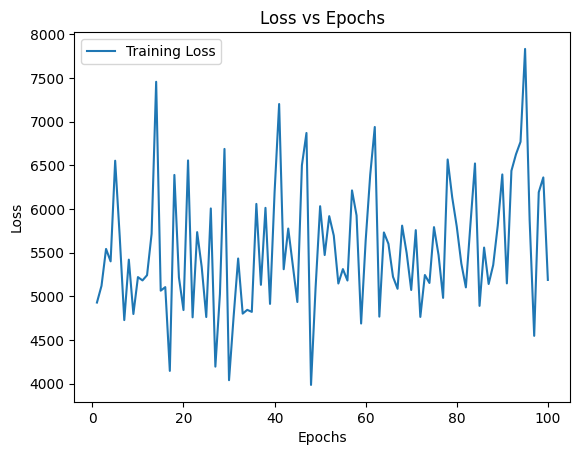

In [55]:
import matplotlib.pyplot as plt  
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()

In [56]:
mse = evaluate_model(test_dl, model)
print('MSE: %.3f, RMSE: %.3f' % (mse, sqrt(mse)))

MSE: 5603.059, RMSE: 74.854


In [57]:
row = [60.915,70.112,65.115]
yhat = predict(row, model)
print('Predicted: %.3f' % yhat)

Predicted: 64.521
